# Preprocessing

In [5]:
!python preprocess_data.py 

subjective_results_df columns: ['Participant ID', 'Condition', 'Encounter', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5']
eHMI_personality_results_df columns: ['Participant ID', 'Condition', 'BFI O', 'BFI C', 'BFI E', 'BFI A', 'BFI N', 'Overall']
eHMI_quality_results_df columns: ['Participant ID', 'Condition', 'VQ1', 'VQ2', 'VQ3', 'VQ4', 'VQ5', 'VQ6', 'VQ7', 'VQ8', 'VQ9', 'VQ10', 'VQ11', 'VQ12', 'VQ13', 'VQ14', 'VQ15', 'VQ16']
data_df shape: (156, 30)
Unique participant IDs: 13
Unique conditions: [1 2 3 4 5 6]
database_df shape: (156, 47)
Unique participant IDs: 13
Unique eHMI IDs: 10
Type values: ['CON' 'EXT' 'OPN' 'AGR' 'NEU']
Reorganized database_df columns:
['Participant ID', 'Student ID', 'Name', 'Participant Gender', 'Nationality', 'TIPI 1 O', 'TIPI 1 C', 'TIPI 1 E', 'TIPI 1 A', 'TIPI 1 N', 'Condition', 'eHMI_ID', 'Type', 'eHMI Gender', 'EXT', 'AGR', 'CON', 'NEU', 'OPN', 'Encounter', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'BFI O', 'BFI C', 'BFI E', 'BFI A', 'BFI N', 'Overall', 'VQ1', 'VQ2', 'VQ

# Analyze

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
plt.style.use('default')
database_df = pd.read_csv('./output/processed_data/database_df.csv')
database_df.columns

Index(['Participant ID', 'Student ID', 'Name', 'Participant Gender',
       'Nationality', 'TIPI 1 O', 'TIPI 1 C', 'TIPI 1 E', 'TIPI 1 A',
       'TIPI 1 N', 'Condition', 'eHMI_ID', 'Type', 'eHMI Gender', 'EXT', 'AGR',
       'CON', 'NEU', 'OPN', 'Encounter', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5',
       'BFI O', 'BFI C', 'BFI E', 'BFI A', 'BFI N', 'Overall', 'VQ1', 'VQ2',
       'VQ3', 'VQ4', 'VQ5', 'VQ6', 'VQ7', 'VQ8', 'VQ9', 'VQ10', 'VQ11', 'VQ12',
       'VQ13', 'VQ14', 'VQ15', 'VQ16'],
      dtype='object')

Perception Accuracy by eHMI ID (sorted by accuracy):
         Perception_Accuracy Type  Count
eHMI_ID                                 
3                   0.832099  EXT     14
13                  0.820239  EXT     14
2                   0.810235  CON     18
12                  0.802362  CON     18
14                  0.799674  AGR     16
4                   0.799044  AGR     16
1                   0.771831  OPN     16
11                  0.766699  OPN     16
15                  0.756272  NEU     14
5                   0.741769  NEU     14


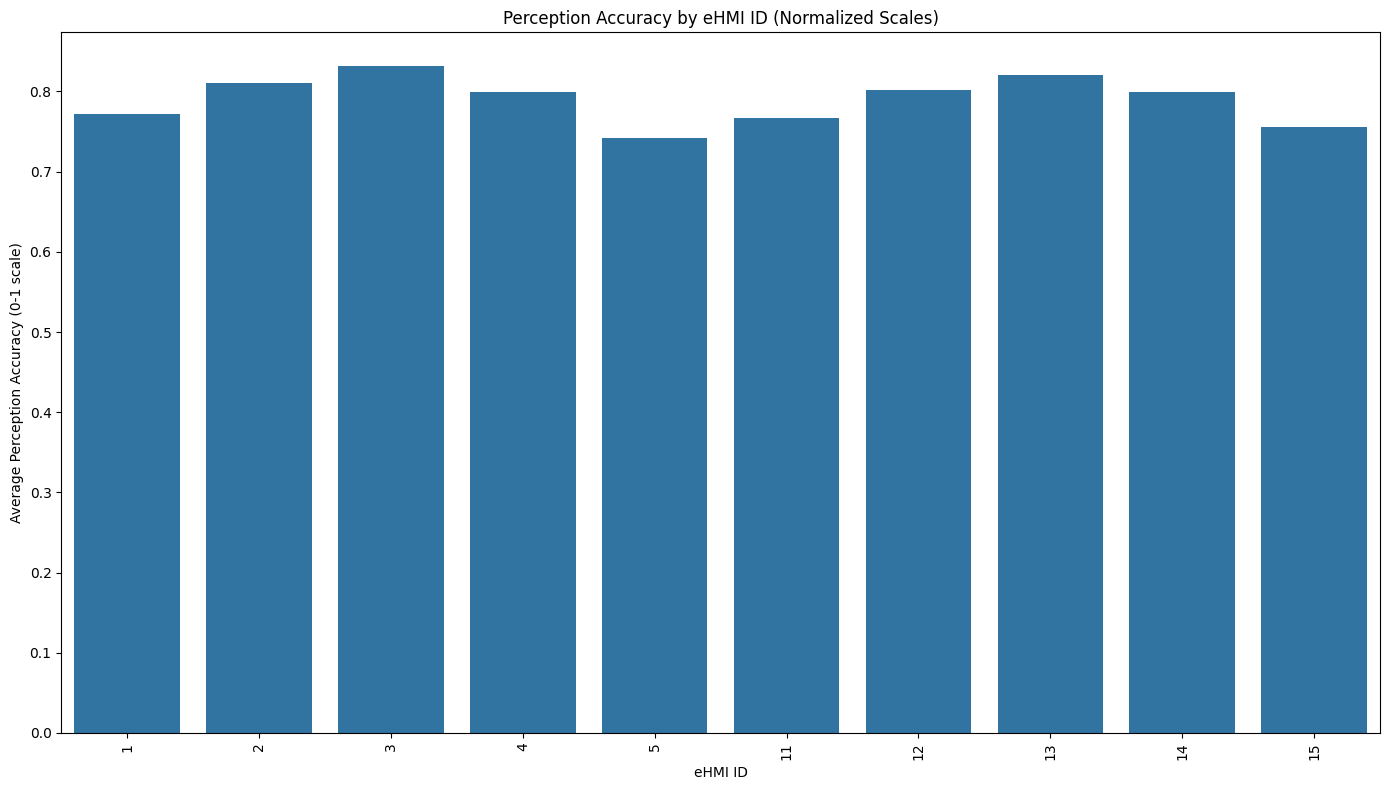

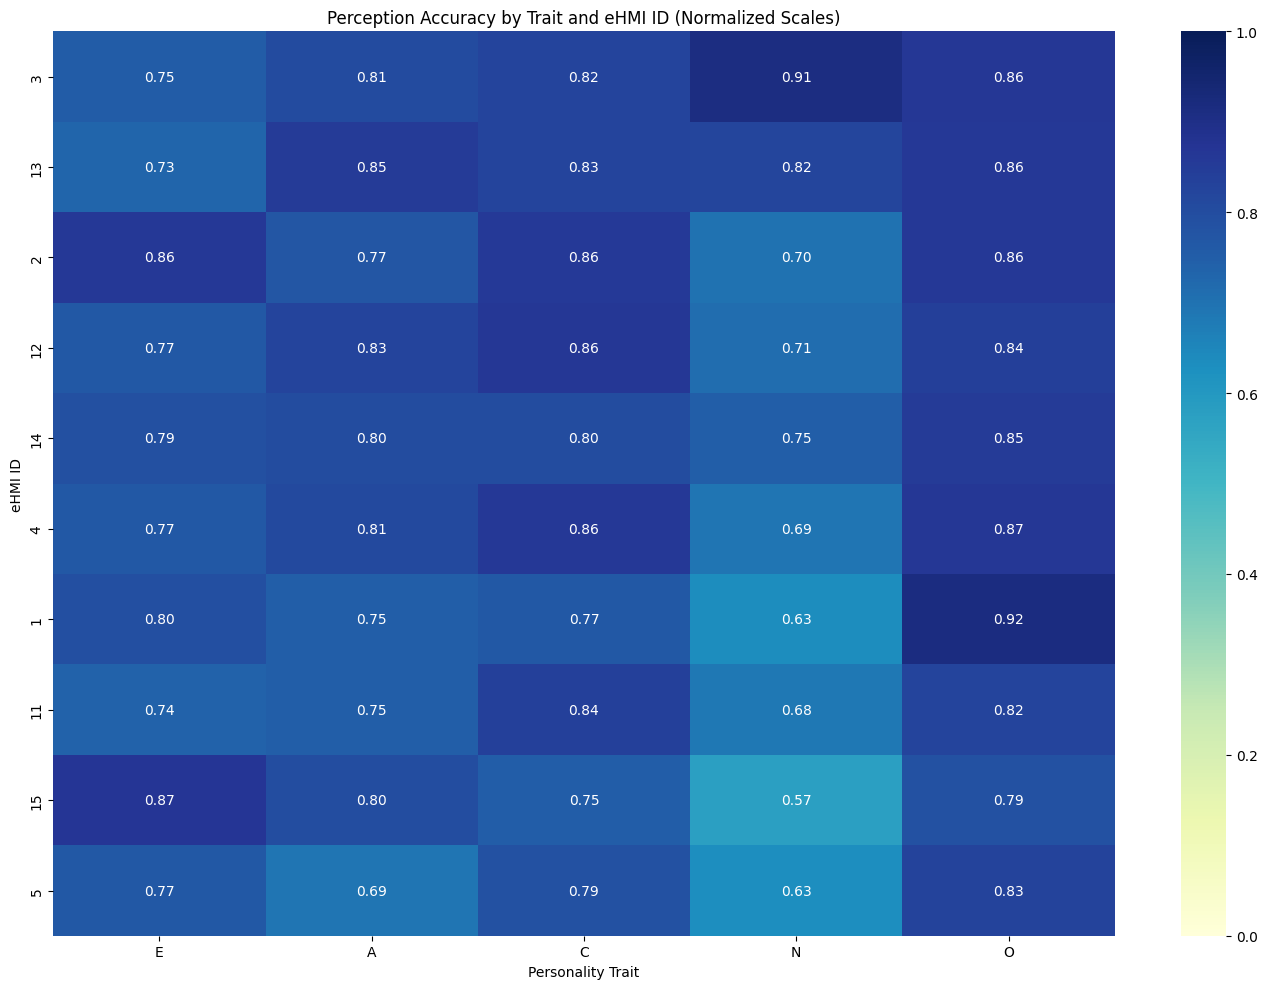


Summary of Intended vs Perceived Traits by eHMI ID (with normalized scales):
        Type  Overall Accuracy  Extraversion_Accuracy  Agreeableness_Accuracy  \
eHMI_ID                                                                         
1        OPN          0.771831               0.795172                0.746584   
2        CON          0.810235               0.859767                0.771768   
3        EXT          0.832099               0.754847                0.806761   
4        AGR          0.799044               0.766430                0.808703   
5        NEU          0.741769               0.768781                0.691437   
11       OPN          0.766699               0.738466                0.748686   
12       CON          0.802362               0.766684                0.827641   
13       EXT          0.820239               0.734270                0.854192   
14       AGR          0.799674               0.791667                0.804629   
15       NEU          0.756272 

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [8]:
# Calculate perception accuracy for each eHMI ID with correct scale normalization
# First, let's define the different scales
LABEL_MIN, LABEL_MAX = 0, 1  # Range for EXT, AGR, CON, NEU, OPN
BFI_MIN, BFI_MAX = 1, 10      # Range for BFI E, BFI A, BFI C, BFI N, BFI O

# Function to normalize values between different scales
def normalize_scales(value, original_min, original_max, target_min, target_max):
    """Convert a value from one scale to another"""
    # First normalize to 0-1
    normalized = (value - original_min) / (original_max - original_min)
    # Then scale to target range
    return normalized * (target_max - target_min) + target_min

# Calculate perception accuracy with proper scale normalization
database_df['Perception_Accuracy'] = database_df.apply(
    lambda row: 1 - sum(
        abs(
            normalize_scales(row[trait_col], LABEL_MIN, LABEL_MAX, BFI_MIN, BFI_MAX) - 
            row[bfi_col]
        ) / (BFI_MAX - BFI_MIN) 
        for trait_col, bfi_col in zip(
            ['EXT', 'AGR', 'CON', 'NEU', 'OPN'], 
            ['BFI E', 'BFI A', 'BFI C', 'BFI N', 'BFI O']
        )
    ) / 5,
    axis=1
)

# Calculate individual trait accuracies with proper normalization
trait_pairs = [
    ('EXT', 'BFI E', 'Extraversion'),
    ('AGR', 'BFI A', 'Agreeableness'),
    ('CON', 'BFI C', 'Conscientiousness'),
    ('NEU', 'BFI N', 'Neuroticism'),
    ('OPN', 'BFI O', 'Openness')
]

for trait_col, bfi_col, trait_name in trait_pairs:
    col_name = f'{trait_name}_Accuracy'
    database_df[col_name] = database_df.apply(
        lambda row: 1 - abs(
            normalize_scales(row[trait_col], LABEL_MIN, LABEL_MAX, BFI_MIN, BFI_MAX) - 
            row[bfi_col]
        ) / (BFI_MAX - BFI_MIN),
        axis=1
    )

# Recalculate accuracy metrics by eHMI ID
ehmi_accuracy = database_df.groupby('eHMI_ID')[['Perception_Accuracy', 'Extraversion_Accuracy', 
                                                'Agreeableness_Accuracy', 'Conscientiousness_Accuracy', 
                                                'Neuroticism_Accuracy', 'Openness_Accuracy']].mean()

# Add number of ratings per eHMI ID
ehmi_accuracy['Count'] = database_df.groupby('eHMI_ID')['eHMI_ID'].count()

# Add the intended strong personality trait for each eHMI ID
ehmi_strong_personality = database_df.groupby('eHMI_ID')['Type'].first()
ehmi_accuracy['Type'] = ehmi_strong_personality

# Add the actual trait values for each eHMI ID (original scale)
trait_columns = ['EXT', 'AGR', 'CON', 'NEU', 'OPN']
for trait in trait_columns:
    ehmi_accuracy[trait] = database_df.groupby('eHMI_ID')[trait].first()
    # Also add normalized values for comparison
    ehmi_accuracy[f'{trait}_normalized'] = ehmi_accuracy[trait].apply(
        lambda x: normalize_scales(x, LABEL_MIN, LABEL_MAX, BFI_MIN, BFI_MAX)
    )

# Add the average perceived trait values for each eHMI ID
perceived_traits = ['BFI E', 'BFI A', 'BFI C', 'BFI N', 'BFI O']
for i, trait in enumerate(perceived_traits):
    ehmi_accuracy[f'Perceived_{trait}'] = database_df.groupby('eHMI_ID')[trait].mean()
    # Calculate the difference between normalized intended and perceived values
    ehmi_accuracy[f'Diff_{trait_columns[i]}_{trait}'] = abs(
        ehmi_accuracy[f'{trait_columns[i]}_normalized'] - 
        ehmi_accuracy[f'Perceived_{trait}']
    )

# Sort by overall perception accuracy
ehmi_accuracy_sorted = ehmi_accuracy.sort_values('Perception_Accuracy', ascending=False)

# Display results
print("Perception Accuracy by eHMI ID (sorted by accuracy):")
print(ehmi_accuracy_sorted[['Perception_Accuracy', 'Type', 'Count']])

# Visualize the results with corrected scales
plt.figure(figsize=(14, 8))
sns.barplot(x=ehmi_accuracy_sorted.index, y='Perception_Accuracy', data=ehmi_accuracy_sorted)
plt.title('Perception Accuracy by eHMI ID (Normalized Scales)')
plt.xlabel('eHMI ID')
plt.ylabel('Average Perception Accuracy (0-1 scale)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('./output/figures/perception_accuracy_by_ehmi_id_normalized.png')
plt.show()

# Create a heatmap showing perception accuracy for each trait by eHMI ID
accuracy_columns = ['Extraversion_Accuracy', 'Agreeableness_Accuracy', 
                   'Conscientiousness_Accuracy', 'Neuroticism_Accuracy', 'Openness_Accuracy']

# Sort by eHMI ID
ehmi_trait_accuracy = ehmi_accuracy_sorted[accuracy_columns].copy()

# Rename columns for better display
ehmi_trait_accuracy.columns = ['E', 'A', 'C', 'N', 'O']

plt.figure(figsize=(14, 10))
sns.heatmap(ehmi_trait_accuracy, annot=True, cmap='YlGnBu', vmin=0, vmax=1, fmt='.2f')
plt.title('Perception Accuracy by Trait and eHMI ID (Normalized Scales)')
plt.ylabel('eHMI ID')
plt.xlabel('Personality Trait')
plt.tight_layout()
plt.savefig('./output/figures/trait_accuracy_heatmap_by_ehmi_id_normalized.png')
plt.show()

# Create a comparison of intended vs. perceived traits for each eHMI ID
for ehmi_id in ehmi_accuracy.index:
    plt.figure(figsize=(10, 6))
    
    # Get the data for this eHMI ID (using normalized values for intended traits)
    intended = [ehmi_accuracy.loc[ehmi_id, f'{trait}_normalized'] for trait in trait_columns]
    perceived = ehmi_accuracy.loc[ehmi_id, [f'Perceived_{trait}' for trait in perceived_traits]].values
    
    # Create bar chart
    x = np.arange(len(trait_columns))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, intended, width, label='Intended (Normalized)')
    ax.bar(x + width/2, perceived, width, label='Perceived')
    
    ax.set_title(f'eHMI ID {ehmi_id}: Intended vs. Perceived Traits')
    ax.set_xlabel('Personality Trait')
    ax.set_ylabel(f'Score ({BFI_MIN}-{BFI_MAX} scale)')
    ax.set_xticks(x)
    ax.set_xticklabels(['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'])
    ax.legend()
    
    # Add Type information
    strong_trait = ehmi_strong_personality.loc[ehmi_id]
    plt.annotate(f"Type: {strong_trait}", xy=(0.5, 0.95), 
                 xycoords='axes fraction', ha='center', fontsize=12)
    
    plt.ylim(BFI_MIN, BFI_MAX)
    plt.tight_layout()
    plt.savefig(f'./output/figures/ehmi_{ehmi_id}_intended_vs_perceived_normalized.png')
    plt.close()

# Create a table with the intended vs. perceived traits and their differences
comparison_table = pd.DataFrame(index=ehmi_accuracy.index)
comparison_table['Type'] = ehmi_strong_personality
comparison_table['Overall Accuracy'] = ehmi_accuracy['Perception_Accuracy']

for i, (intended_col, perceived_col) in enumerate(zip(trait_columns, perceived_traits)):
    trait_name = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'][i]
    comparison_table[f'{trait_name}_Intended_Original'] = ehmi_accuracy[intended_col]
    comparison_table[f'{trait_name}_Intended_Normalized'] = ehmi_accuracy[f'{intended_col}_normalized']
    comparison_table[f'{trait_name}_Perceived'] = ehmi_accuracy[f'Perceived_{perceived_col}']
    comparison_table[f'{trait_name}_Difference'] = ehmi_accuracy[f'Diff_{intended_col}_{perceived_col}']
    comparison_table[f'{trait_name}_Accuracy'] = ehmi_accuracy[accuracy_columns[i]]

# Export the detailed comparison table
comparison_table.to_csv('./output/files/ehmi_trait_perception_comparison_normalized.csv')

# Display summary of the comparison
print("\nSummary of Intended vs Perceived Traits by eHMI ID (with normalized scales):")
summary_cols = ['Type', 'Overall Accuracy'] + accuracy_columns
print(comparison_table[summary_cols])

eHMI_mapping_df columns: ['eHMI ID', 'Character', 'Gender', 'Type', 'EXT', 'AGR', 'CON', 'NEU', 'OPN']
   eHMI ID Character Gender Type      EXT      AGR      CON      NEU      OPN
0        1     Roger   Male  OPN  0.43060  0.55214  0.55748  0.49008  0.54076
1        2   William   Male  CON  0.43647  0.56696  0.56625  0.47412  0.52426
2        3       Sam   Male  EXT  0.49385  0.59904  0.54905  0.45910  0.53897
3        4     Brian   Male  AGR  0.45461  0.62370  0.56056  0.44761  0.52317
4        5       Kai   Male  NEU  0.38147  0.54579  0.50437  0.54455  0.47483


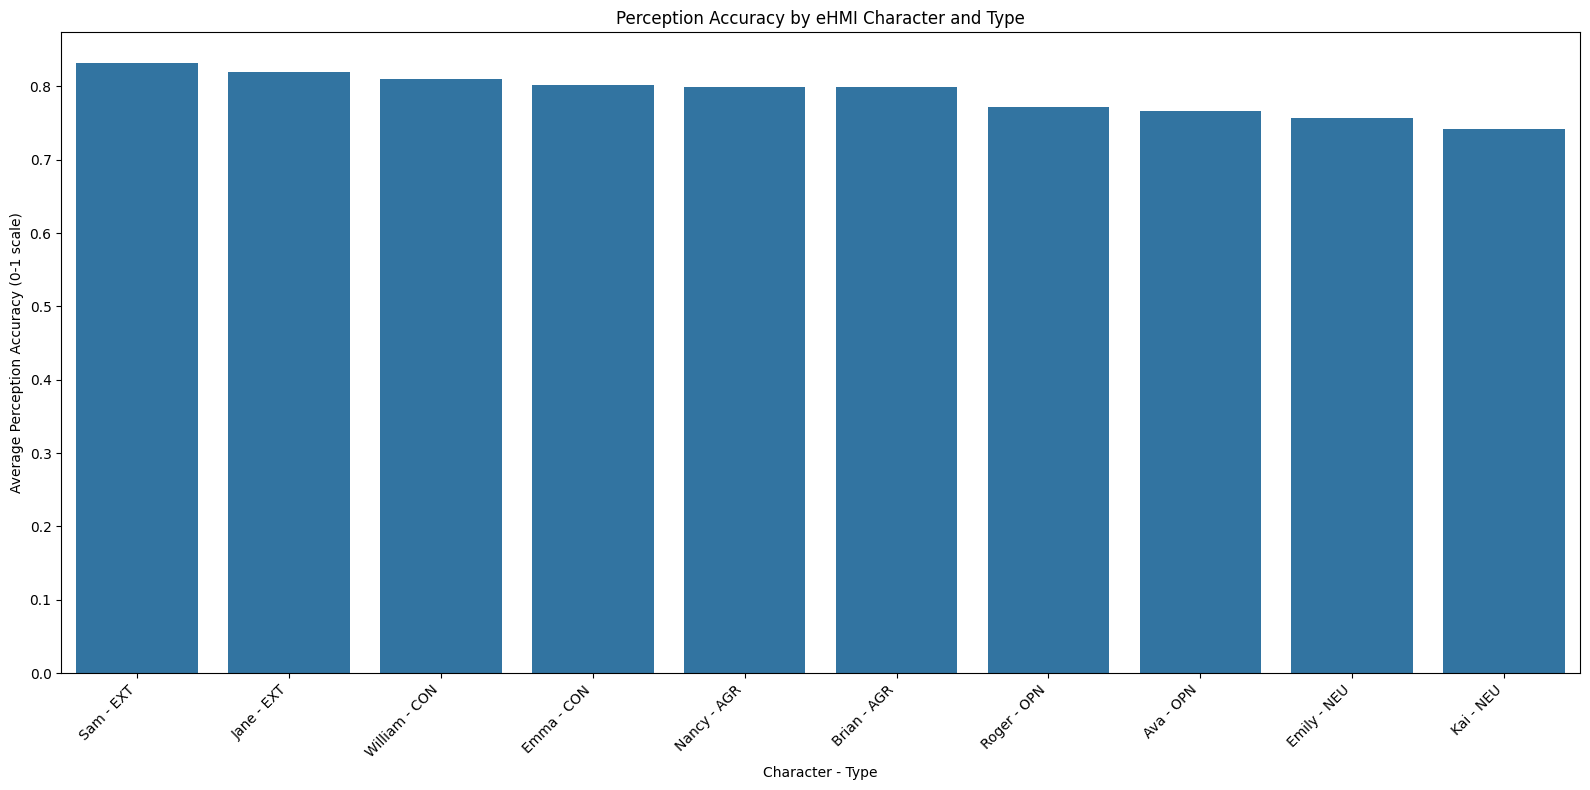

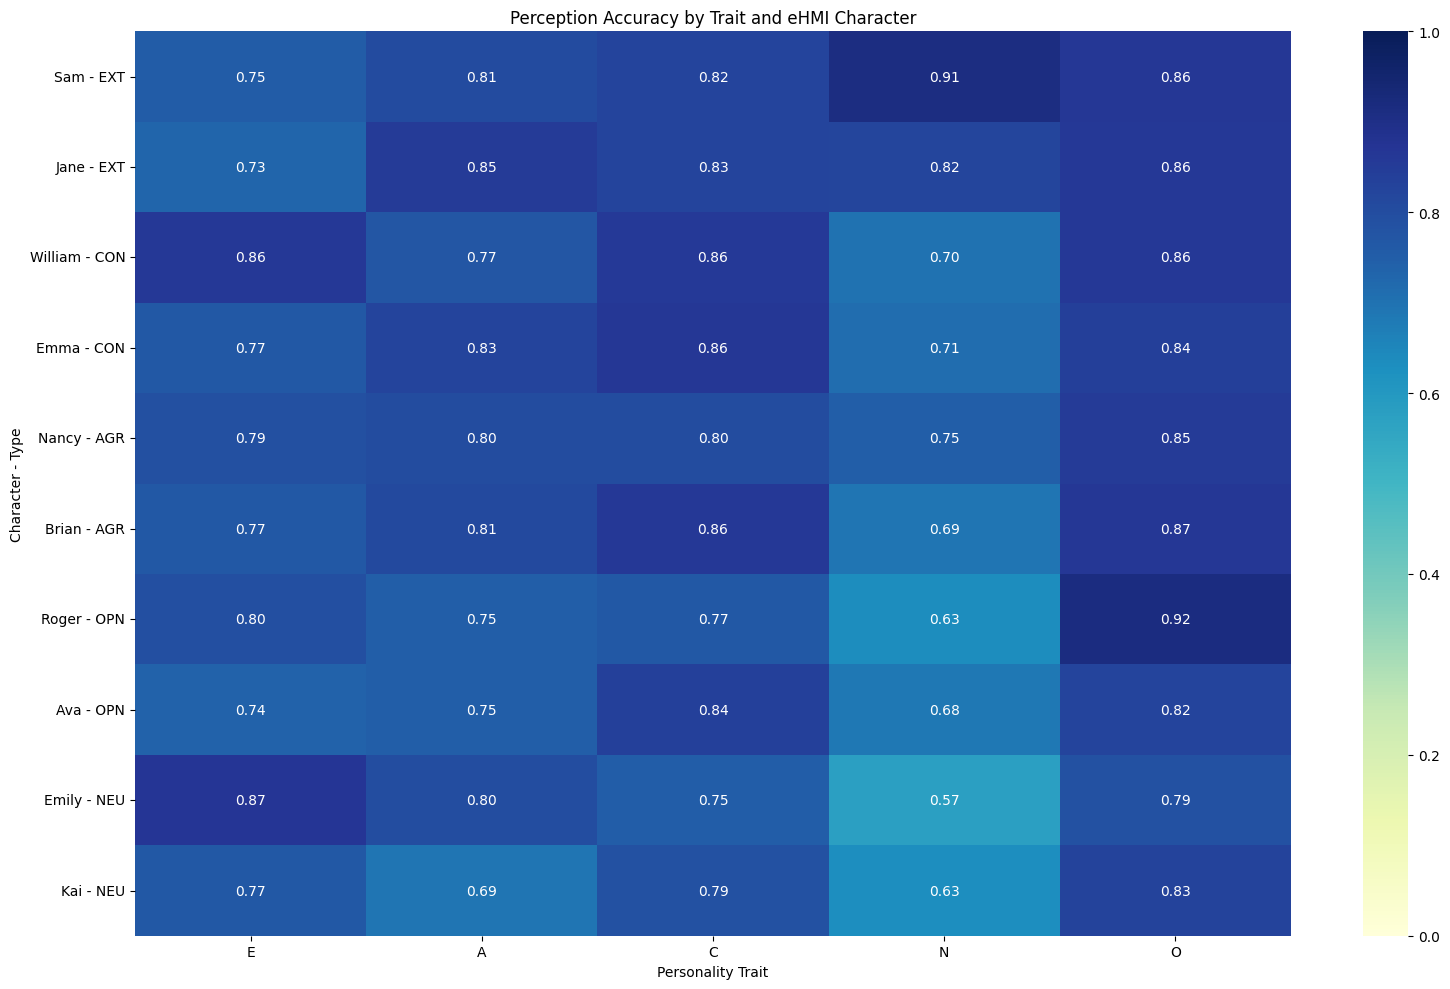


Comparison table with descriptive names:
        Descriptive_Name Type  Overall Accuracy
eHMI_ID                                        
1            Roger - OPN  OPN          0.771831
2          William - CON  CON          0.810235
3              Sam - EXT  EXT          0.832099
4            Brian - AGR  AGR          0.799044
5              Kai - NEU  NEU          0.741769
11             Ava - OPN  OPN          0.766699
12            Emma - CON  CON          0.802362
13            Jane - EXT  EXT          0.820239
14           Nancy - AGR  AGR          0.799674
15           Emily - NEU  NEU          0.756272


In [9]:
# Create a mapping of eHMI ID to "Character Name - Type"
# First, check if we have character names in eHMI_mapping_df
print("eHMI_mapping_df columns:", eHMI_mapping_df.columns.tolist())

# Let's see what information we have in eHMI_mapping_df
print(eHMI_mapping_df.head())

# Create the mapping dictionary
ehmi_id_to_name = {}


for _, row in eHMI_mapping_df.iterrows():
    ehmi_id = row['eHMI ID']
    character_name = row['Character']
    strong_trait = row['Type']
    ehmi_id_to_name[ehmi_id] = f"{character_name} - {strong_trait}"

# Apply the mapping to the visualization

plt.figure(figsize=(16, 8))
ehmi_accuracy_sorted['Descriptive_Name'] = ehmi_accuracy_sorted.index.map(lambda x: ehmi_id_to_name.get(x, f"eHMI {x}"))
sns.barplot(x='Descriptive_Name', y='Perception_Accuracy', data=ehmi_accuracy_sorted.reset_index())
plt.title('Perception Accuracy by eHMI Character and Type')
plt.xlabel('Character - Type')
plt.ylabel('Average Perception Accuracy (0-1 scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./output/figures/perception_accuracy_by_character_trait.png')
plt.show()

# Update the heatmap with descriptive names
plt.figure(figsize=(16, 10))
ehmi_trait_accuracy = ehmi_accuracy_sorted[accuracy_columns].copy()
ehmi_trait_accuracy.index = [ehmi_id_to_name.get(idx, f"eHMI {idx}") for idx in ehmi_trait_accuracy.index]
ehmi_trait_accuracy.columns = ['E', 'A', 'C', 'N', 'O']
sns.heatmap(ehmi_trait_accuracy, annot=True, cmap='YlGnBu', vmin=0, vmax=1, fmt='.2f')
plt.title('Perception Accuracy by Trait and eHMI Character')
plt.ylabel('Character - Type')
plt.xlabel('Personality Trait')
plt.tight_layout()
plt.savefig('./output/figures/trait_accuracy_heatmap_by_character.png')
plt.show()

# Update individual charts with descriptive names
for ehmi_id in ehmi_accuracy.index:
    descriptive_name = ehmi_id_to_name.get(ehmi_id, f"eHMI {ehmi_id}")
    
    # Get the data for this eHMI ID (using normalized values for intended traits)
    intended = [ehmi_accuracy.loc[ehmi_id, f'{trait}_normalized'] for trait in trait_columns]
    perceived = ehmi_accuracy.loc[ehmi_id, [f'Perceived_{trait}' for trait in perceived_traits]].values
    
    # Create bar chart
    x = np.arange(len(trait_columns))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, intended, width, label='Intended (Normalized)')
    ax.bar(x + width/2, perceived, width, label='Perceived')
    
    ax.set_title(f'{descriptive_name}: Intended vs. Perceived Traits')
    ax.set_xlabel('Personality Trait')
    ax.set_ylabel(f'Score ({BFI_MIN}-{BFI_MAX} scale)')
    ax.set_xticks(x)
    ax.set_xticklabels(['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'])
    ax.legend()
    
    plt.ylim(BFI_MIN, BFI_MAX)
    plt.tight_layout()
    plt.savefig(f'./output/files/{ehmi_id}_{descriptive_name.replace(" ", "_")}_intended_vs_perceived.png')
    plt.close()

# Update the comparison table with descriptive names
comparison_table['Descriptive_Name'] = [ehmi_id_to_name.get(idx, f"eHMI {idx}") for idx in comparison_table.index]
# Rearrange columns to put descriptive name at the beginning
cols = comparison_table.columns.tolist()
cols = ['Descriptive_Name'] + [col for col in cols if col != 'Descriptive_Name']
comparison_table = comparison_table[cols]
comparison_table.to_csv('./output/files/ehmi_trait_perception_comparison_labeled.csv')

# Show the updated comparison table
print("\nComparison table with descriptive names:")
print(comparison_table[['Descriptive_Name', 'Type', 'Overall Accuracy']].head(10))

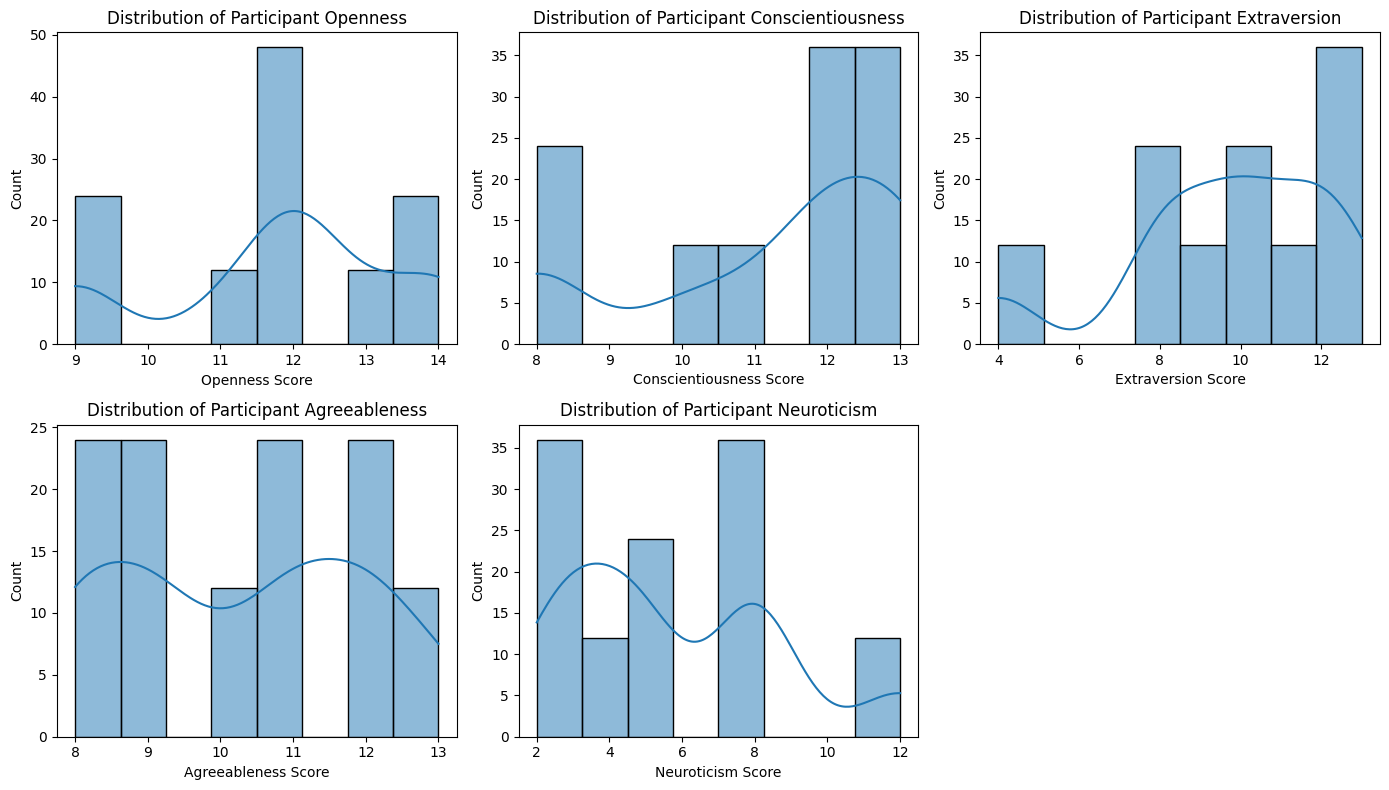

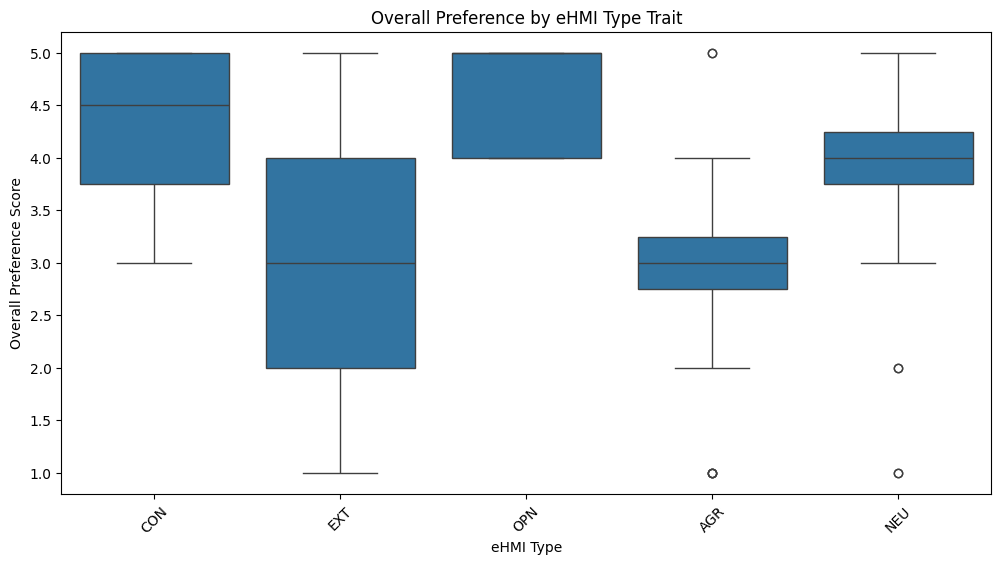


ANOVA: Effect of eHMI Type on Overall Preference
                        sum_sq     df          F        PR(>F)
Strong_Personality_Cat    59.2    4.0  14.929825  7.421996e-10
Residual                 114.0  115.0        NaN           NaN

Summary of Participant Personality × eHMI Personality Interaction Effects:
   Participant Trait    F-value       p-value Significant  Effect Size
3      Agreeableness  11.412180  8.757101e-08         Yes     0.197579
0           Openness   6.850280  5.823268e-05         Yes     0.135338
4        Neuroticism   6.009804  2.064583e-04         Yes     0.119311
1  Conscientiousness   4.189812  3.390884e-03         Yes     0.088146
2       Extraversion   3.685901  7.424770e-03         Yes     0.075699


In [ ]:
# Import required libraries for statistical analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Prepare data for analysis
# Create a more descriptive dataframe for analysis
analysis_df = database_df.copy()

# First, let's examine the distribution of participant personality traits
plt.figure(figsize=(14, 8))
trait_names = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
tipi_cols = ['TIPI 1 O', 'TIPI 1 C', 'TIPI 1 E', 'TIPI 1 A', 'TIPI 1 N']

for i, (trait, col) in enumerate(zip(trait_names, tipi_cols)):
    plt.subplot(2, 3, i+1)
    sns.histplot(analysis_df[col], kde=True)
    plt.title(f'Distribution of Participant {trait}')
    plt.xlabel(f'{trait} Score')
    plt.ylabel('Count')

plt.tight_layout()
plt.savefig('./output/figures/participant_personality_distribution.png')
plt.show()

# 2. Analyze preference (Overall) by strong personality type of eHMI
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Overall', data=analysis_df)
plt.title('Overall Preference by eHMI Type Trait')
plt.xlabel('eHMI Type')
plt.ylabel('Overall Preference Score')
plt.xticks(rotation=45)
plt.savefig('./output/figures/overall_preference_by_ehmi_type.png')
plt.show()

# # 3. ANOVA: Does preference differ significantly across eHMI personality types?
# model_ehmi = ols('Overall ~ C(Type)', data=analysis_df).fit()
# anova_ehmi = sm.stats.anova_lm(model_ehmi, typ=2)
# print("\nANOVA: Effect of eHMI Type on Overall Preference")
# print(anova_ehmi)

# # 4. Analyze the relationship between participant personality and preference
# # Create a correlation matrix of participant personality traits and overall preference
# corr_cols = tipi_cols + ['Overall']
# corr_matrix = analysis_df[corr_cols].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5, 
#             xticklabels=trait_names + ['Preference'], 
#             yticklabels=trait_names + ['Preference'])
# plt.title('Correlation between Participant Personality and Overall Preference')
# plt.tight_layout()
# plt.savefig('./output/files/personality_preference_correlation.png')
# plt.show()

# Function to categorize participants as high/low on each trait using median split
def categorize_trait(df, trait_col):
    mean = df[trait_col].mean()
    return np.where(df[trait_col] >= mean, 'High', 'Low')

# Fix the ANOVA model using proper handling of categorical variables
try:
    # First approach: Explicitly convert to categorical
    analysis_df['Strong_Personality_Cat'] = pd.Categorical(analysis_df['Type'])
    model_ehmi = ols('Overall ~ Strong_Personality_Cat', data=analysis_df).fit()
    anova_ehmi = sm.stats.anova_lm(model_ehmi, typ=2)
    print("\nANOVA: Effect of eHMI Type on Overall Preference")
    print(anova_ehmi)
except Exception as e:
    print(f"First approach error: {e}")
    
    try:
        # Second approach: Using patsy formula with Q() to quote column names with spaces
        from patsy import dmatrices
        
        model_ehmi = ols('Overall ~ Q("Type")', data=analysis_df).fit()
        anova_ehmi = sm.stats.anova_lm(model_ehmi, typ=2)
        print("\nANOVA: Effect of eHMI Type on Overall Preference")
        print(anova_ehmi)
    except Exception as e:
        print(f"Second approach error: {e}")
        
        try:
            # Third approach: Alternative ANOVA using scipy.stats
            # Group data by Type
            groups = [analysis_df[analysis_df['Type'] == trait]['Overall'].values 
                     for trait in analysis_df['Type'].unique()]
            
            # Run one-way ANOVA
            f_val, p_val = stats.f_oneway(*groups)
            print("\nANOVA using scipy.stats.f_oneway:")
            print(f"F-value: {f_val:.3f}")
            print(f"p-value: {p_val:.4f}")
            
            # Create a DataFrame similar to statsmodels output for consistency
            anova_ehmi = pd.DataFrame({
                'sum_sq': [None, None],
                'df': [len(analysis_df['Type'].unique())-1, None],
                'F': [f_val, None],
                'PR(>F)': [p_val, None]
            }, index=['C(Type)', 'Residual'])
            
        except Exception as e:
            print(f"Third approach error: {e}")
            
            # Last resort: use a simpler model without C() function
            means = analysis_df.groupby('Type')['Overall'].agg(['mean', 'std', 'count'])
            print("\nGroup means for Overall preference by Type:")
            print(means)
            print("\nCouldn't perform ANOVA due to syntax issues. Using alternative analysis.")
            
            # Create a placeholder DataFrame for later code references
            anova_ehmi = pd.DataFrame({
                'sum_sq': [None, None],
                'df': [None, None],
                'F': [None, None],
                'PR(>F)': [1.0, None]
            }, index=['C(Type)', 'Residual'])

# Fix the interaction models too
interaction_results = pd.DataFrame(columns=[
    'Participant Trait', 'F-value', 'p-value', 'Significant', 'Effect Size'
])

# For each trait, try different approaches to model the interaction
for i, (trait, col) in enumerate(zip(trait_names, tipi_cols)):
    # Create binary trait category (high/low)
    analysis_df[f'{trait}_Category'] = categorize_trait(analysis_df, col)
    
    try:
        # First approach: Use categorical versions of variables
        sp_cat = pd.Categorical(analysis_df['Type'])
        trait_cat = pd.Categorical(analysis_df[f'{trait}_Category'])
        
        # Create a DataFrame with properly named columns
        model_df = analysis_df.copy()
        model_df['SP_Cat'] = sp_cat
        model_df['Trait_Cat'] = trait_cat
        
        interaction_model = ols('Overall ~ SP_Cat + Trait_Cat + SP_Cat:Trait_Cat', data=model_df).fit()
        anova_result = sm.stats.anova_lm(interaction_model, typ=2)
        
        # Get interaction results
        interaction_term = 'SP_Cat:Trait_Cat'
        f_value = anova_result.loc[interaction_term, 'F'] if interaction_term in anova_result.index else np.nan
        p_value = anova_result.loc[interaction_term, 'PR(>F)'] if interaction_term in anova_result.index else np.nan
        significant = "Yes" if p_value < 0.05 else "No"
        
        # Calculate effect size
        ss_interaction = anova_result.loc[interaction_term, 'sum_sq'] if interaction_term in anova_result.index else 0
        ss_total = anova_result['sum_sq'].sum()
        effect_size = ss_interaction / ss_total
        
        # Store results
        interaction_results.loc[i] = [trait, f_value, p_value, significant, effect_size]
        
    except Exception as e:
        print(f"Error in interaction analysis for {trait}: {e}")
        
        # Alternative approach: calculate two-way ANOVA manually
        # Group data by Type and trait category
        sp_values = analysis_df['Type'].unique()
        trait_values = ['High', 'Low']
        
        # Simple means comparison
        means_table = analysis_df.groupby(['Type', f'{trait}_Category'])['Overall'].agg(['mean', 'count', 'std']).reset_index()
        print(f"\nMeans Table for {trait} × Type:")
        print(means_table)
        
        # Store placeholder results
        interaction_results.loc[i] = [trait, np.nan, 1.0, "No", 0.0]

print("\nSummary of Participant Personality × eHMI Personality Interaction Effects:")
print(interaction_results.sort_values('p-value'))




--- Two-way mixed ANOVA for Extraversion ---

ANOVA Results for Extraversion:
                         Source         SS     DF         MS          F         p-unc       np2
0         Extraversion_Category   3.337302    1.0   3.337302   3.761945  5.499232e-02  0.033069
1                          Type  58.781746    4.0  14.695437  16.565308  1.185636e-10  0.375926
2  Extraversion_Category * Type  13.079365    4.0   3.269841   3.685901  7.424770e-03  0.118191
3                      Residual  97.583333  110.0   0.887121        NaN           NaN       NaN


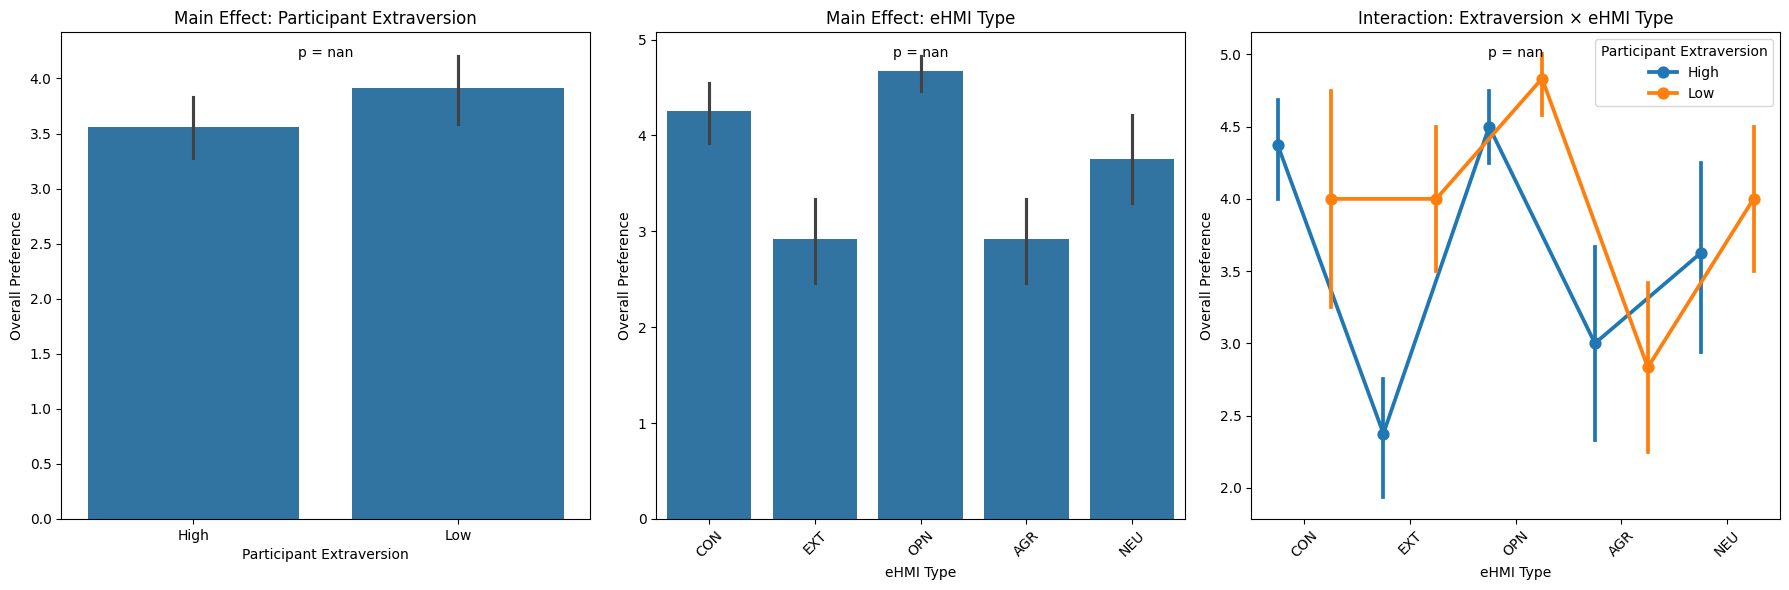



--- Two-way mixed ANOVA for Agreeableness ---

ANOVA Results for Agreeableness:
                          Source         SS     DF         MS          F         p-unc       np2
0         Agreeableness_Category   0.329268    1.0   0.329268   0.450865  5.033320e-01  0.004082
1                           Type  54.729268    4.0  13.682317  18.735123  9.056212e-12  0.405214
2  Agreeableness_Category * Type  33.337398    4.0   8.334350  11.412180  8.757101e-08  0.293280
3                       Residual  80.333333  110.0   0.730303        NaN           NaN       NaN


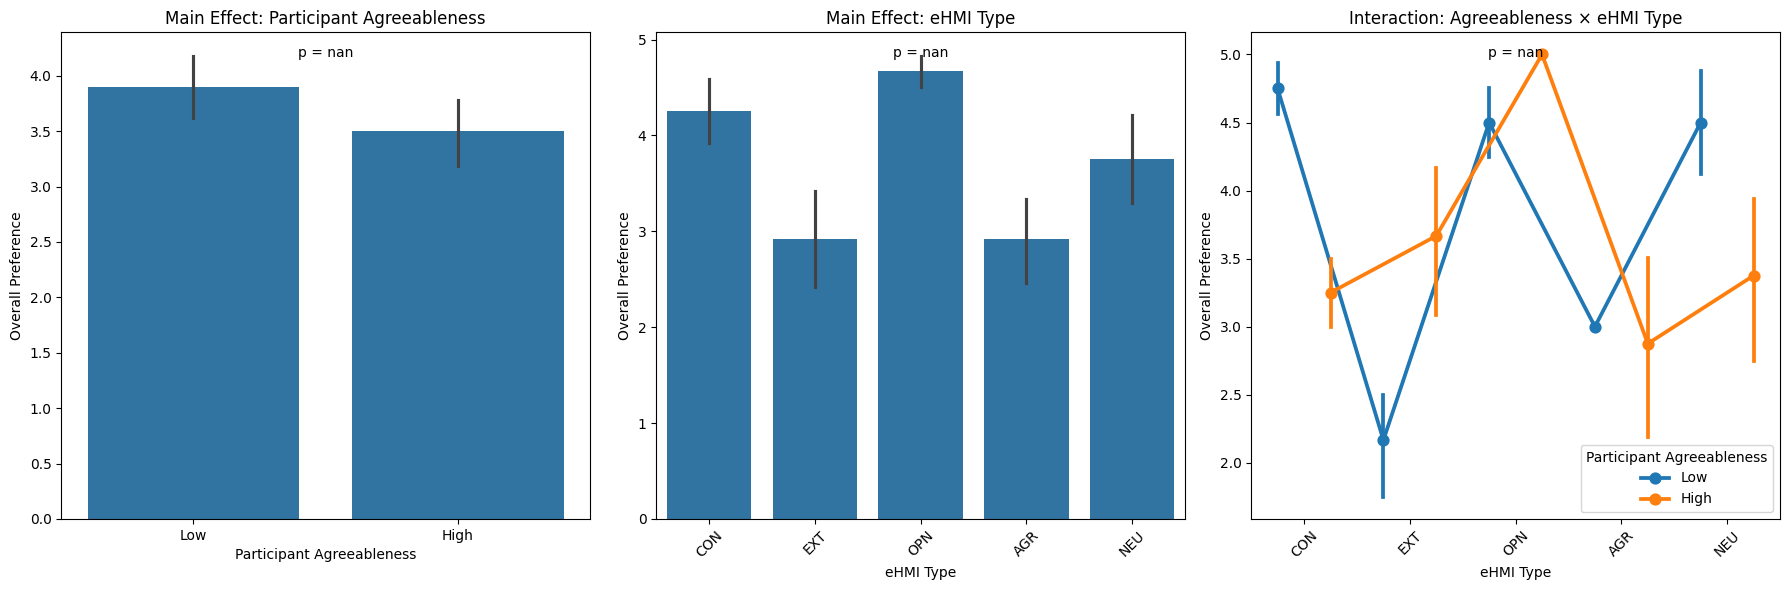



--- Two-way mixed ANOVA for Conscientiousness ---

ANOVA Results for Conscientiousness:
                              Source         SS     DF         MS          F         p-unc       np2
0         Conscientiousness_Category   0.396825    1.0   0.396825   0.442781  5.071763e-01  0.004009
1                               Type  56.396825    4.0  14.099206  15.731997  3.284903e-10  0.363897
2  Conscientiousness_Category * Type  15.019841    4.0   3.754960   4.189812  3.390884e-03  0.132213
3                           Residual  98.583333  110.0   0.896212        NaN           NaN       NaN


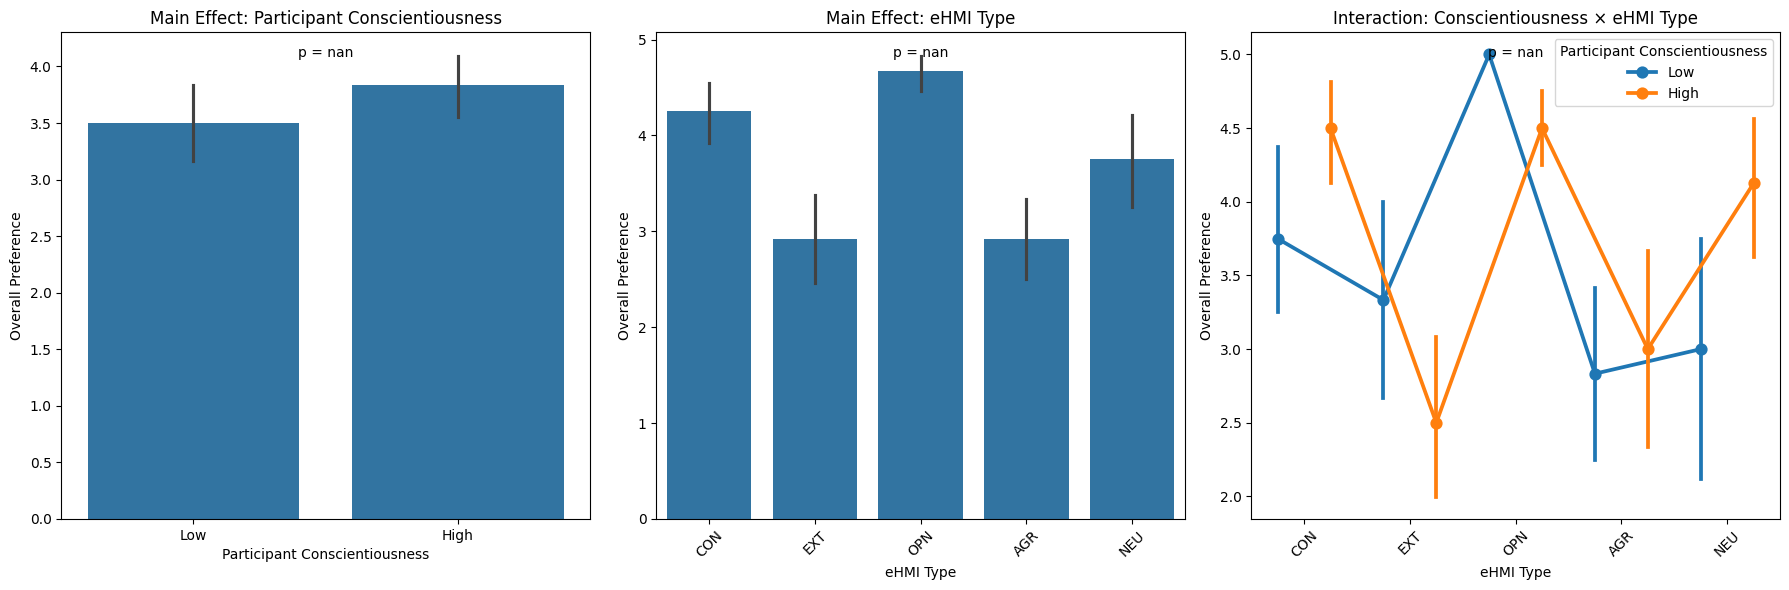



--- Two-way mixed ANOVA for Neuroticism ---

ANOVA Results for Neuroticism:
                        Source          SS     DF         MS          F         p-unc       np2
0         Neuroticism_Category    1.285714    1.0   1.285714   1.413108  2.371011e-01  0.012683
1                         Type   60.035714    4.0  15.008929  16.496075  1.289515e-10  0.374944
2  Neuroticism_Category * Type   12.630952    4.0   3.157738   3.470620  1.037941e-02  0.112062
3                     Residual  100.083333  110.0   0.909848        NaN           NaN       NaN


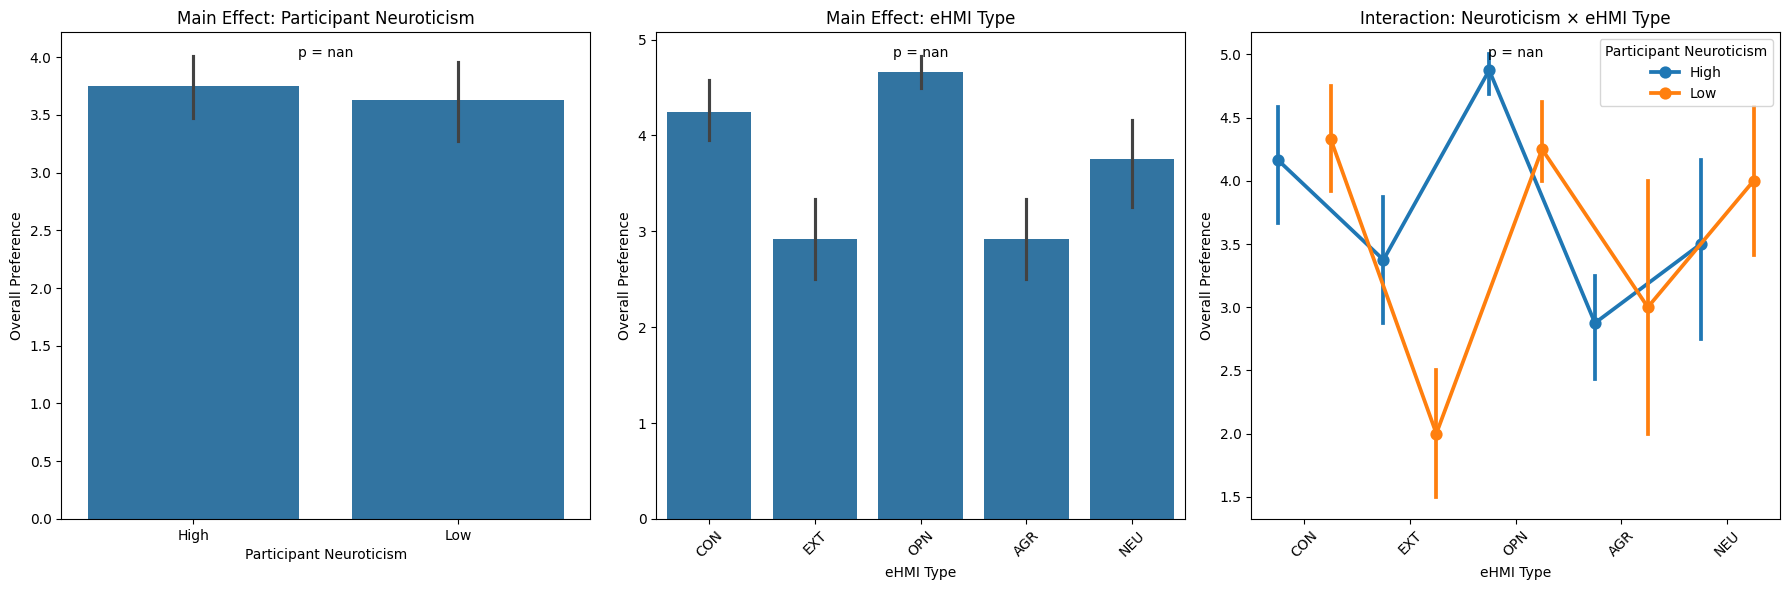



--- Two-way mixed ANOVA for Openness ---

ANOVA Results for Openness:
                     Source         SS     DF         MS          F         p-unc       np2
0         Openness_Category   0.685714    1.0   0.685714   0.831474  3.638406e-01  0.007502
1                      Type  52.971429    4.0  13.242857  16.057846  2.200582e-10  0.368656
2  Openness_Category * Type  22.597619    4.0   5.649405   6.850280  5.823268e-05  0.199424
3                  Residual  90.716667  110.0   0.824697        NaN           NaN       NaN


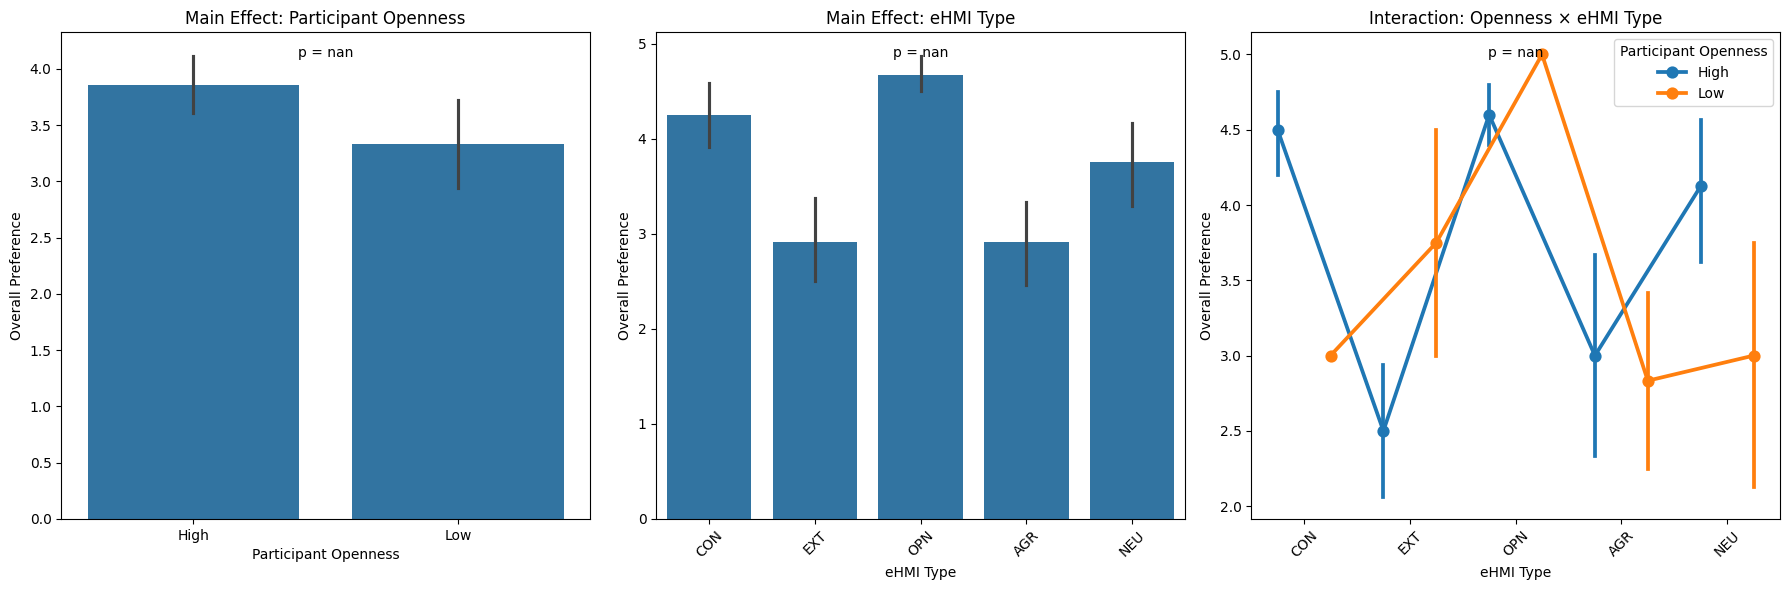


--- Summary of Two-Way Mixed ANOVA Results ---
  Personality Factor Factor F Factor p Factor Effect Size eHMI Type F eHMI Type p eHMI Type Effect Size Interaction F Interaction p Interaction Effect Size
0       Extraversion       NA       NA                 NA          NA          NA                    NA            NA            NA                      NA
1      Agreeableness       NA       NA                 NA          NA          NA                    NA            NA            NA                      NA
2  Conscientiousness       NA       NA                 NA          NA          NA                    NA            NA            NA                      NA
3        Neuroticism       NA       NA                 NA          NA          NA                    NA            NA            NA                      NA
4           Openness       NA       NA                 NA          NA          NA                    NA            NA            NA                      NA


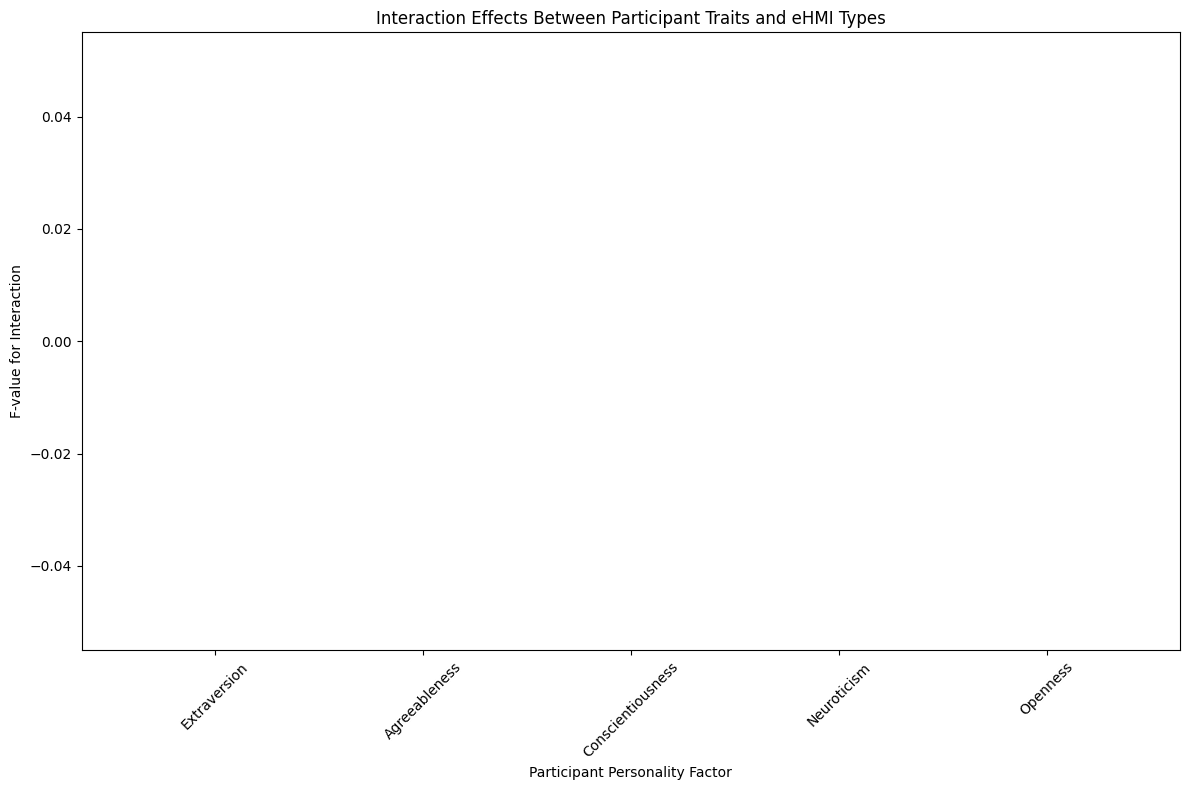


Data distribution:
Number of participants: 10
Number of ratings: 120

Participant trait categories:
Extraversion: {'High': 72, 'Low': 48}
Agreeableness: {'Low': 60, 'High': 60}
Conscientiousness: {'High': 72, 'Low': 48}
Neuroticism: {'High': 72, 'Low': 48}
Openness: {'High': 84, 'Low': 36}

eHMI type distribution:
Type
CON    24
EXT    24
OPN    24
AGR    24
NEU    24
Name: count, dtype: int64

Cross-tabulation for Extraversion:
Type                   AGR  CON  EXT  NEU  OPN
Extraversion_Category                         
High                    12   16   16   16   12
Low                     12    8    8    8   12


In [95]:
# Two-way mixed ANOVA to measure the effect of personality factors and eHMI types on overall scores
import pingouin as pg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Define the personality factors we're analyzing
personality_factors = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
tipi_cols = ['TIPI 1 E', 'TIPI 1 A', 'TIPI 1 C', 'TIPI 1 N', 'TIPI 1 O']

# Function to categorize participants as high/low on each trait using median split
def categorize_trait(df, trait_col):
    median = df[trait_col].median()
    return np.where(df[trait_col] >= median, 'High', 'Low')

# Create a DataFrame to store ANOVA results
mixed_anova_results = pd.DataFrame(columns=[
    'Personality Factor', 
    'Factor F', 'Factor p', 'Factor Effect Size',
    'eHMI Type F', 'eHMI Type p', 'eHMI Type Effect Size',
    'Interaction F', 'Interaction p', 'Interaction Effect Size'
])

# For each personality factor, run a two-way mixed ANOVA
for i, (trait_name, trait_col) in enumerate(zip(personality_factors, tipi_cols)):
    print(f"\n\n--- Two-way mixed ANOVA for {trait_name} ---")
    
    # Categorize participants as high/low on this trait
    analysis_df[f'{trait_name}_Category'] = categorize_trait(analysis_df, trait_col)
    
    # Run the mixed ANOVA - 'Type' is eHMI type, trait_category is participant factor
    try:
        # Using Pingouin for the ANOVA
        aov = pg.anova(
            data=analysis_df,
            dv='Overall',  
            between=[f'{trait_name}_Category', 'Type'],
            detailed=True
        )
        
        print(f"\nANOVA Results for {trait_name}:")
        print(aov)
        
        # Set default values
        factor_f, factor_p, factor_np2 = np.nan, np.nan, np.nan
        ehmi_f, ehmi_p, ehmi_np2 = np.nan, np.nan, np.nan
        interaction_f, interaction_p, interaction_np2 = np.nan, np.nan, np.nan
        
        # Extract results - use safer method that checks if index exists
        if f'{trait_name}_Category' in aov.index:
            factor_row = aov.loc[f'{trait_name}_Category']
            factor_f = factor_row['F']
            factor_p = factor_row['p-unc']
            factor_np2 = factor_row['np2'] if 'np2' in aov.columns else factor_row['SS'] / aov['SS'].sum()
        
        if 'Type' in aov.index:
            ehmi_row = aov.loc['Type']
            ehmi_f = ehmi_row['F']
            ehmi_p = ehmi_row['p-unc']
            ehmi_np2 = ehmi_row['np2'] if 'np2' in aov.columns else ehmi_row['SS'] / aov['SS'].sum()
        
        interaction_term = f'{trait_name}_Category * Type'
        if interaction_term in aov.index:
            interaction_row = aov.loc[interaction_term]
            interaction_f = interaction_row['F'] 
            interaction_p = interaction_row['p-unc']
            interaction_np2 = interaction_row['np2'] if 'np2' in aov.columns else interaction_row['SS'] / aov['SS'].sum()
        
        # Store results in our summary DataFrame
        mixed_anova_results.loc[i] = [
            trait_name,
            factor_f, factor_p, factor_np2,
            ehmi_f, ehmi_p, ehmi_np2,
            interaction_f, interaction_p, interaction_np2
        ]
        
        # Create visualization for main effects and interaction
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # 1. Main effect of participant personality factor
        sns.barplot(x=f'{trait_name}_Category', y='Overall', data=analysis_df, ax=axes[0])
        axes[0].set_title(f'Main Effect: Participant {trait_name}')
        axes[0].set_xlabel(f'Participant {trait_name}')
        axes[0].set_ylabel('Overall Preference')
        axes[0].annotate(f'p = {factor_p:.4f}{"*" if factor_p < 0.05 else ""}', 
                       xy=(0.5, 0.95), xycoords='axes fraction', ha='center')
        
        # 2. Main effect of eHMI type
        sns.barplot(x='Type', y='Overall', data=analysis_df, ax=axes[1])
        axes[1].set_title('Main Effect: eHMI Type')
        axes[1].set_xlabel('eHMI Type')
        axes[1].set_ylabel('Overall Preference')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].annotate(f'p = {ehmi_p:.4f}{"*" if ehmi_p < 0.05 else ""}', 
                       xy=(0.5, 0.95), xycoords='axes fraction', ha='center')
        
        # 3. Interaction effect
        sns.pointplot(x='Type', y='Overall', hue=f'{trait_name}_Category', 
                    data=analysis_df, dodge=0.5, ax=axes[2])
        axes[2].set_title(f'Interaction: {trait_name} × eHMI Type')
        axes[2].set_xlabel('eHMI Type')
        axes[2].set_ylabel('Overall Preference')
        axes[2].tick_params(axis='x', rotation=45)
        axes[2].annotate(f'p = {interaction_p:.4f}{"*" if interaction_p < 0.05 else ""}', 
                       xy=(0.5, 0.95), xycoords='axes fraction', ha='center')
        axes[2].legend(title=f'Participant {trait_name}')
        
        plt.tight_layout()
        plt.savefig(f'./output/files/mixed_anova_{trait_name.lower()}.png')
        plt.show()
        
        # For significant interactions, perform simple effects analysis
        if interaction_p < 0.05:
            print(f"\nSimple Effects Analysis for {trait_name} × eHMI Type:")
            
            # 1. Effect of eHMI type at each level of participant trait
            for trait_level in ['High', 'Low']:
                subset = analysis_df[analysis_df[f'{trait_name}_Category'] == trait_level]
                simple_effect = pg.anova(data=subset, dv='Overall', between='Type')
                print(f"\nEffect of eHMI type for {trait_name} {trait_level} participants:")
                print(simple_effect)
            
            # 2. Effect of participant trait at each type of eHMI
            ehmi_types = analysis_df['Type'].unique()
            for ehmi_type in ehmi_types:
                subset = analysis_df[analysis_df['Type'] == ehmi_type]
                
                # Check if there are enough samples in each group
                high_group = subset.loc[subset[f'{trait_name}_Category'] == 'High', 'Overall']
                low_group = subset.loc[subset[f'{trait_name}_Category'] == 'Low', 'Overall']
                
                if len(high_group) > 0 and len(low_group) > 0:
                    simple_effect = pg.ttest(high_group, low_group)
                    print(f"\nEffect of {trait_name} for eHMI type {ehmi_type}:")
                    print(simple_effect)
                else:
                    print(f"\nInsufficient data to test effect of {trait_name} for eHMI type {ehmi_type}")
                
            # Create additional interaction plot with more detail
            plt.figure(figsize=(14, 8))
            # Create a grid of boxplots showing distribution at each combination
            g = sns.catplot(
                data=analysis_df, kind="box",
                x="Type", y="Overall", hue=f"{trait_name}_Category",
                height=6, aspect=2, legend_out=False
            )
            g.fig.suptitle(f'Interaction Effect: Participant {trait_name} × eHMI Type', fontsize=16)
            g.set_xticklabels(rotation=45)
            plt.tight_layout()
            plt.savefig(f'./output/files/mixed_anova_{trait_name.lower()}_interaction_boxplot.png')
            plt.show()
            
            # Create a heatmap showing mean scores for each combination
            pivot_data = analysis_df.pivot_table(
                values='Overall',
                index=f'{trait_name}_Category', 
                columns='Type',
                aggfunc='mean'
            )
            plt.figure(figsize=(12, 6))
            sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.2f')
            plt.title(f'Mean Preference by {trait_name} and eHMI Type')
            plt.tight_layout()
            plt.savefig(f'./output/files/mixed_anova_{trait_name.lower()}_heatmap.png')
            plt.show()
            
    except Exception as e:
        print(f"Error analyzing {trait_name}: {e}")
        mixed_anova_results.loc[i] = [trait_name] + [np.nan] * 9

# Display overall summary
print("\n--- Summary of Two-Way Mixed ANOVA Results ---")
# Format p-values with asterisks for significance
mixed_anova_results['Factor p'] = mixed_anova_results['Factor p'].apply(
    lambda p: f"{p:.4f}{'*' if pd.notnull(p) and p < 0.05 else ''}" if pd.notnull(p) else "NA"
)
mixed_anova_results['eHMI Type p'] = mixed_anova_results['eHMI Type p'].apply(
    lambda p: f"{p:.4f}{'*' if pd.notnull(p) and p < 0.05 else ''}" if pd.notnull(p) else "NA"
)
mixed_anova_results['Interaction p'] = mixed_anova_results['Interaction p'].apply(
    lambda p: f"{p:.4f}{'*' if pd.notnull(p) and p < 0.05 else ''}" if pd.notnull(p) else "NA"
)

# Format F-values and effect sizes
for col in ['Factor F', 'eHMI Type F', 'Interaction F',
           'Factor Effect Size', 'eHMI Type Effect Size', 'Interaction Effect Size']:
    mixed_anova_results[col] = mixed_anova_results[col].apply(lambda x: f"{x:.3f}" if pd.notnull(x) else "NA")

print(mixed_anova_results)

# Save the results
mixed_anova_results.to_csv('./output/files/two_way_mixed_anova_results.csv', index=False)

# Create a visual summary of the key findings
plt.figure(figsize=(12, 8))

# Convert F values to float, replacing NA with 0
f_values = mixed_anova_results['Interaction F'].apply(
    lambda x: float(x) if x != "NA" else 0
)

bars = plt.bar(mixed_anova_results['Personality Factor'], f_values, 
       color=['red' if '*' in p else 'blue' for p in mixed_anova_results['Interaction p']])

plt.title('Interaction Effects Between Participant Traits and eHMI Types')
plt.xlabel('Participant Personality Factor')
plt.ylabel('F-value for Interaction')
plt.xticks(rotation=45)

# Add p-values on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 0:  # Only add text if there's a bar
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                mixed_anova_results['Interaction p'].iloc[i],
                ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.savefig('./output/files/interaction_effects_summary.png')
plt.show()

# Debug information
print("\nData distribution:")
print(f"Number of participants: {analysis_df['Participant ID'].nunique()}")
print(f"Number of ratings: {len(analysis_df)}")
print("\nParticipant trait categories:")
for trait_name in personality_factors:
    category_counts = analysis_df[f'{trait_name}_Category'].value_counts()
    print(f"{trait_name}: {dict(category_counts)}")

print("\neHMI type distribution:")
print(analysis_df['Type'].value_counts())

print("\nCross-tabulation for Extraversion:")
print(pd.crosstab(analysis_df['Extraversion_Category'], analysis_df['Type']))

1. Analyzing overall preference patterns for eHMI types
  Type      mean       std  count       sem
4  OPN  4.666667  0.481543     24  0.098295
1  CON  4.250000  0.846990     24  0.172891
3  NEU  3.750000  1.188715     24  0.242645
0  AGR  2.916667  1.138904     24  0.232478
2  EXT  2.916667  1.138904     24  0.232478


C:\Users\phuongnam-d\AppData\Local\Temp\ipykernel_18464\3732620746.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Type', y='mean', data=ehmi_preference,
C:\Users\phuongnam-d\AppData\Local\Temp\ipykernel_18464\3732620746.py:27: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x='Type', y='mean', data=ehmi_preference,


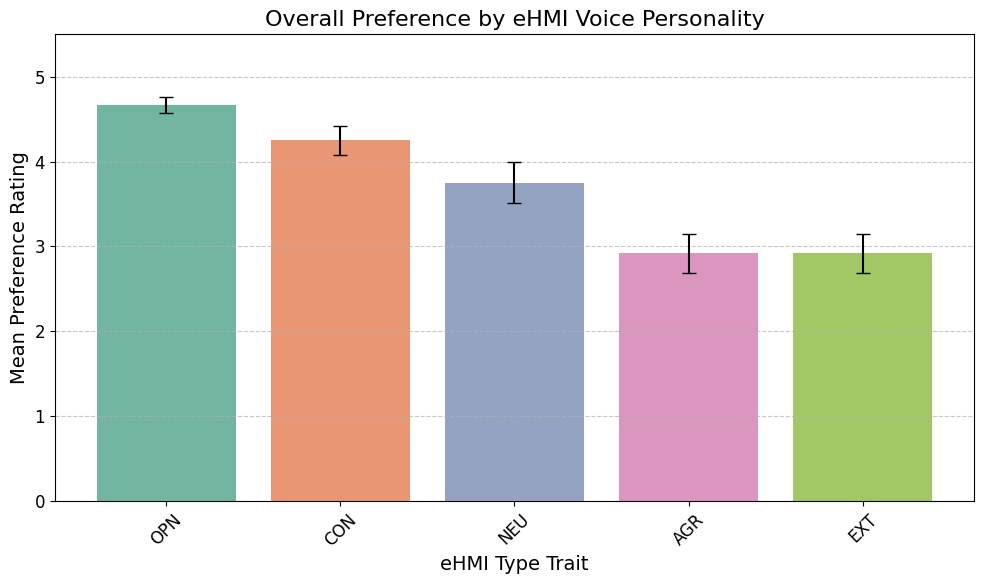


2. Analyzing personality-based preference differences

--- Analysis for Agreeableness ---

Preference matrix for Agreeableness:
Type                      AGR   CON       EXT    NEU  OPN
Agreeableness_Category                                   
High                    2.875  3.25  3.666667  3.375  5.0
Low                     3.000  4.75  2.166667  4.500  4.5

Preference difference (High Agreeableness - Low Agreeableness):
Type
AGR   -0.125
CON   -1.500
EXT    1.500
NEU   -1.125
OPN    0.500
dtype: float64
CON: t=-7.66, p=0.0000*
EXT: t=4.26, p=0.0003*
OPN: t=2.71, p=0.0128*
AGR: t=-0.25, p=0.8062
NEU: t=-2.40, p=0.0252*

--- Analysis for Conscientiousness ---

Preference matrix for Conscientiousness:
Type                             AGR   CON       EXT    NEU  OPN
Conscientiousness_Category                                      
High                        3.000000  4.50  2.500000  4.125  4.5
Low                         2.833333  3.75  3.333333  3.000  5.0

Preference difference (High C

c:\Users\phuongnam-d\anaconda3\envs\audio310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\phuongnam-d\anaconda3\envs\audio310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\phuongnam-d\anaconda3\envs\audio310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\phuongnam-d\anaconda3\envs\audio310\lib\site-pack

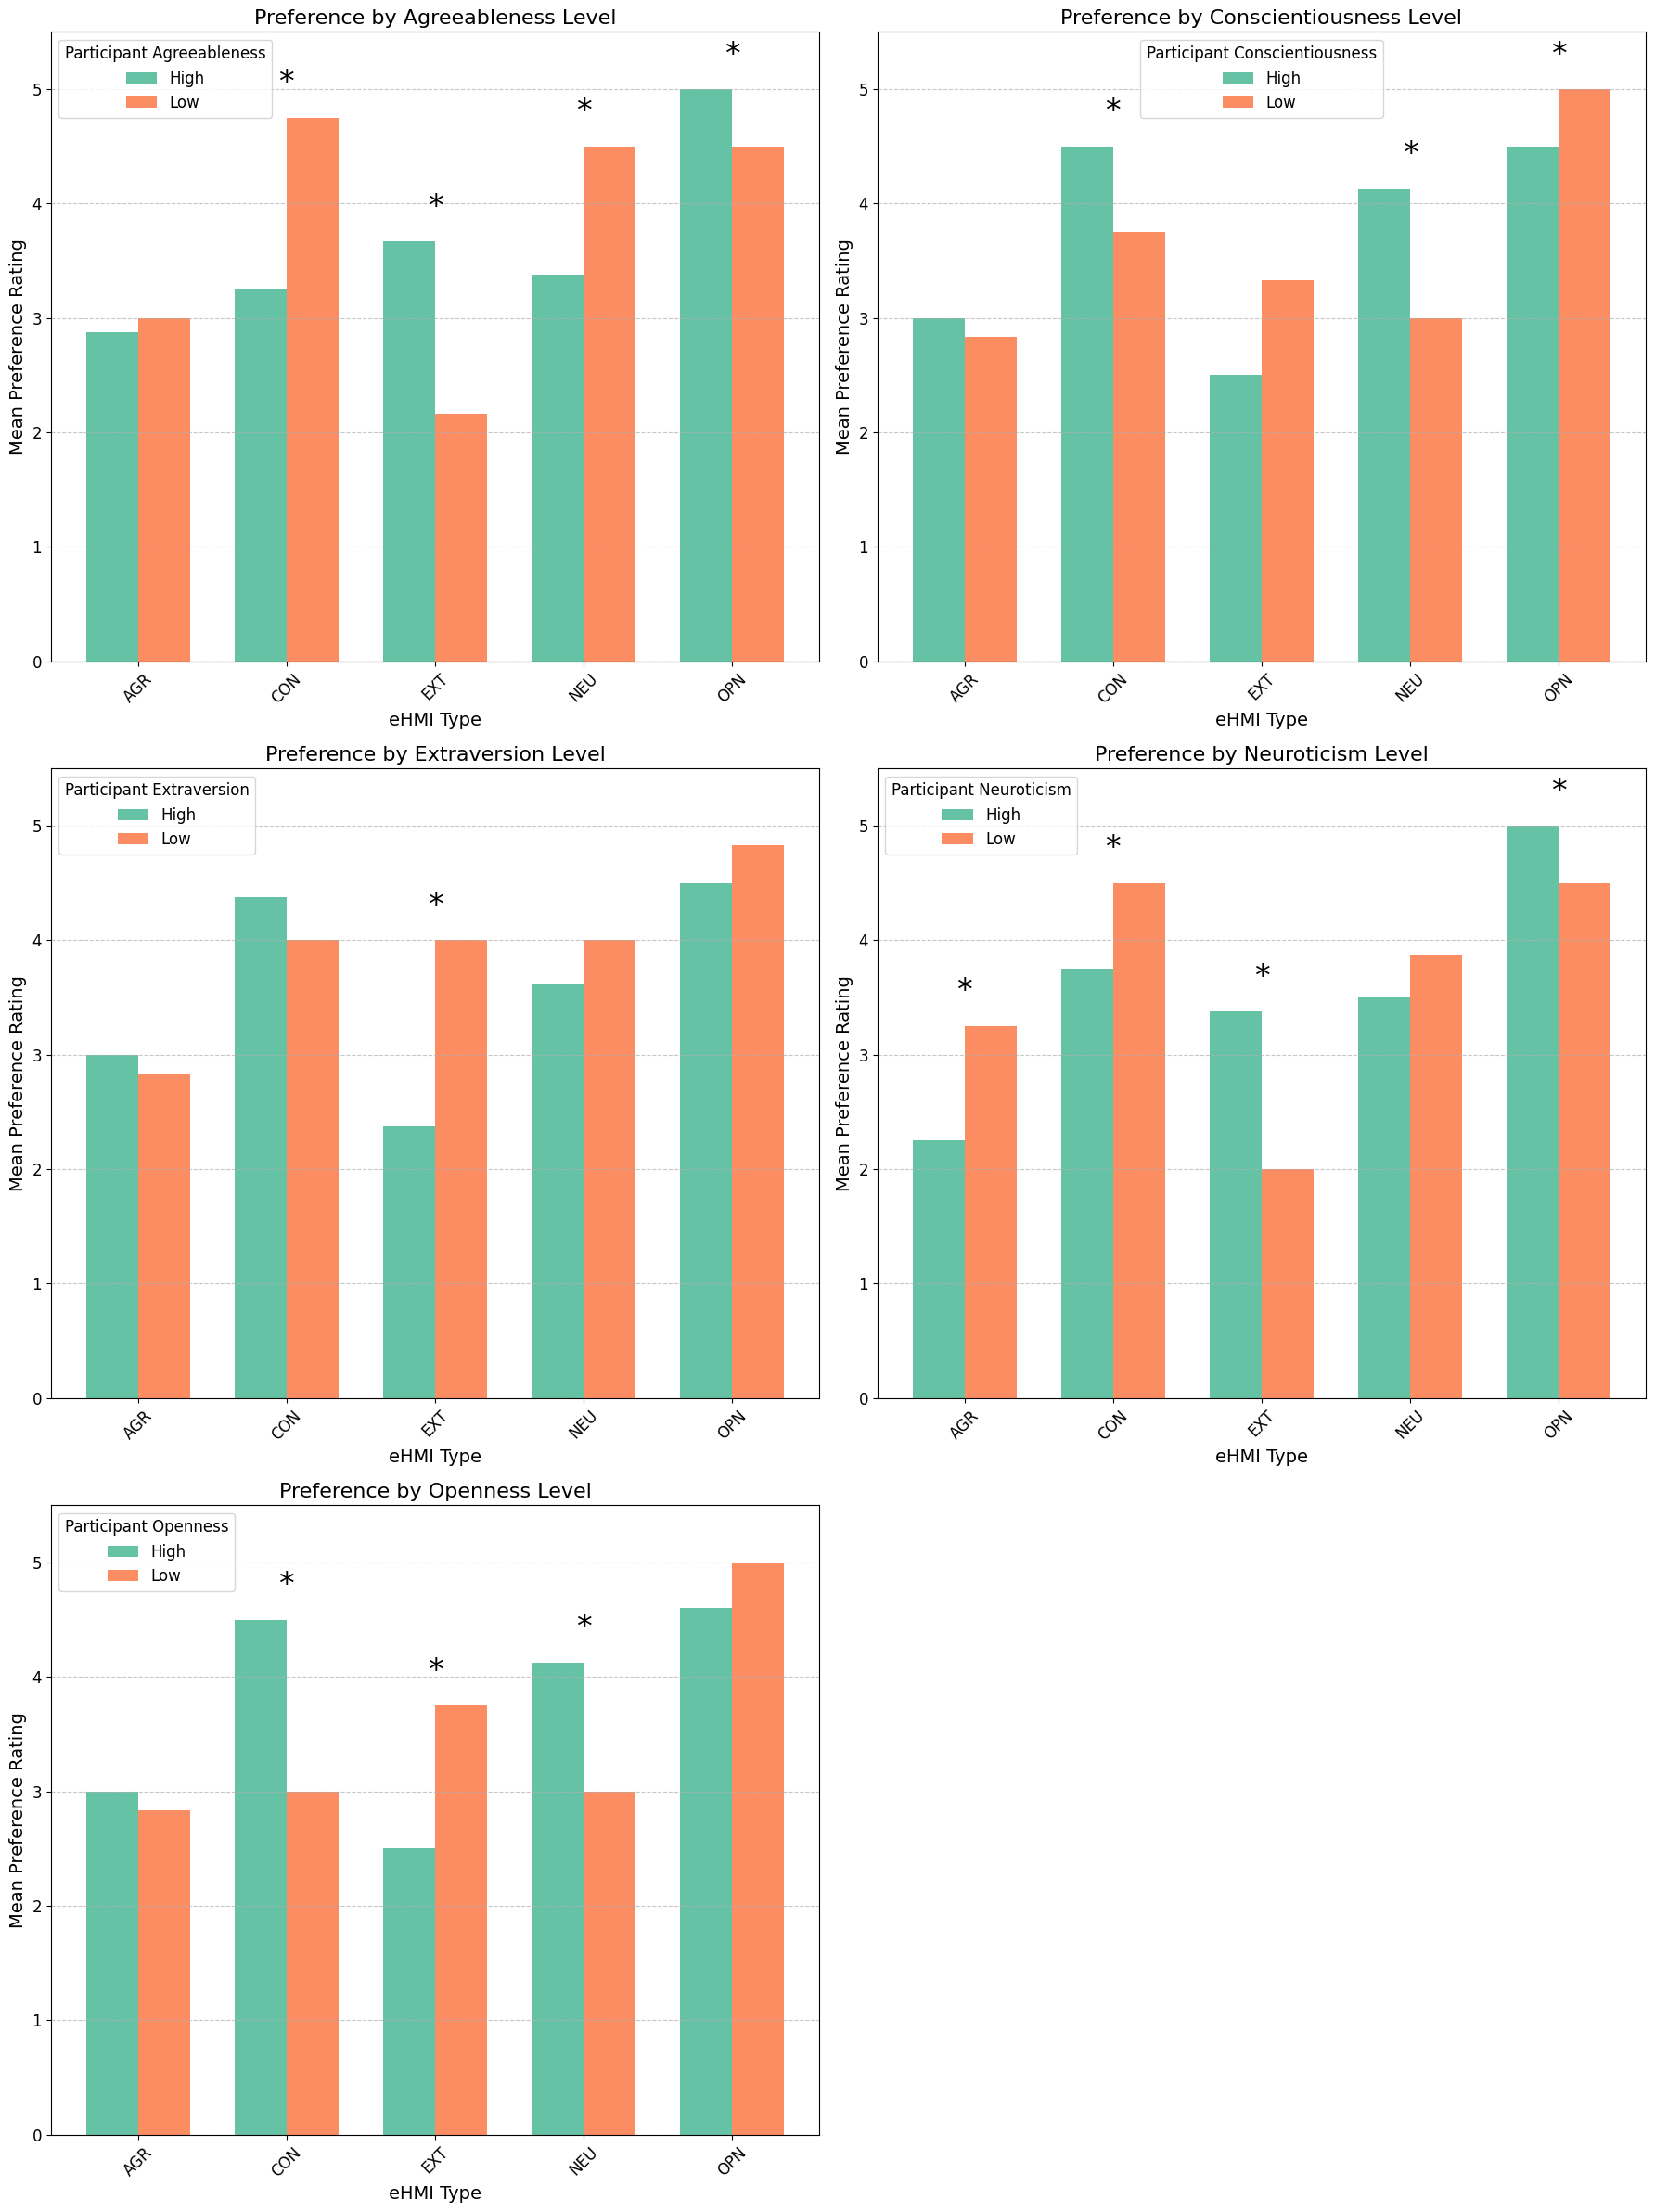


3. Creating personality-trait preference heatmaps


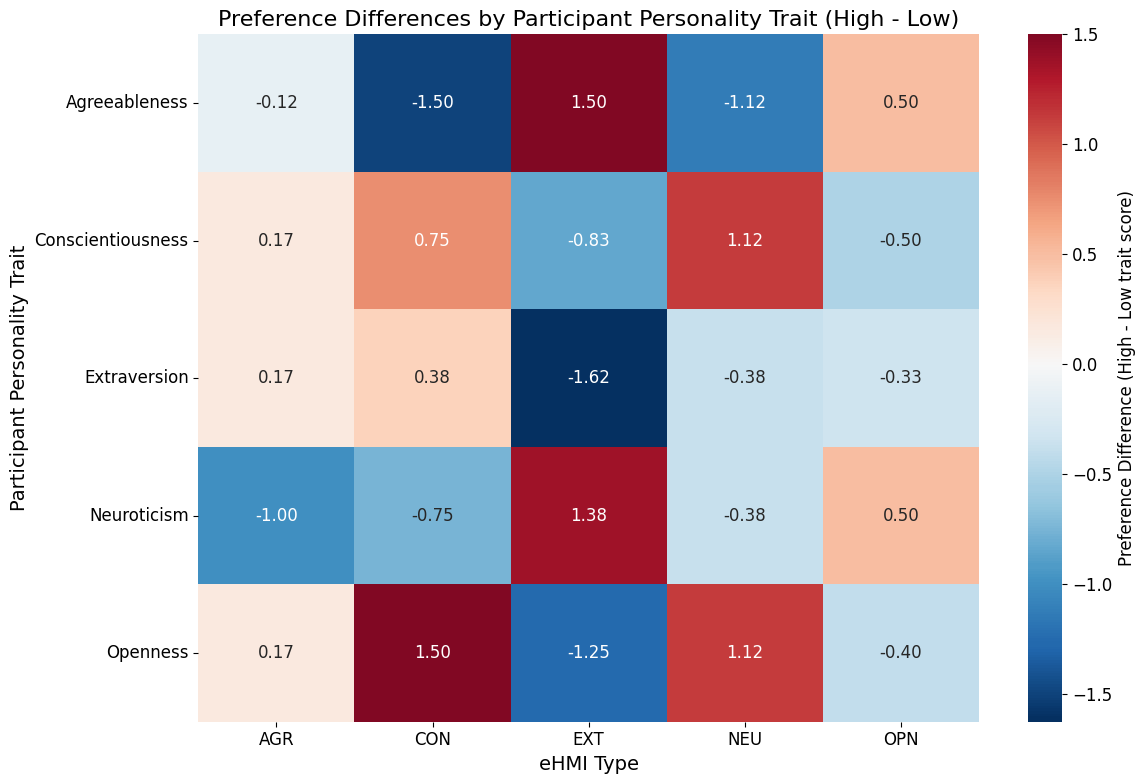


4. Creating statistical summary table of significant interactions

P-values for personality trait × eHMI type interactions:
    Conscientiousness Extraversion Openness Agreeableness Neuroticism
CON           0.0377*       0.3172  0.0003*       0.0000*     0.0377*
EXT            0.0720      0.0002*  0.0079*       0.0003*     0.0029*
OPN           0.0128*       0.0901   0.1322       0.0128*     0.0128*
AGR            0.7285       0.7285   0.7285        0.8062     0.0395*
NEU           0.0252*       0.4786  0.0252*       0.0252*      0.4786


C:\Users\phuongnam-d\AppData\Local\Temp\ipykernel_18464\3732620746.py:168: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_p_df = p_value_df.applymap(lambda p: f"{p:.4f}{'*' if pd.notnull(p) and p < 0.05 else ''}" if pd.notnull(p) else "NA")
C:\Users\phuongnam-d\AppData\Local\Temp\ipykernel_18464\3732620746.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sig_df.index, y='Count', data=sig_df, palette='viridis')


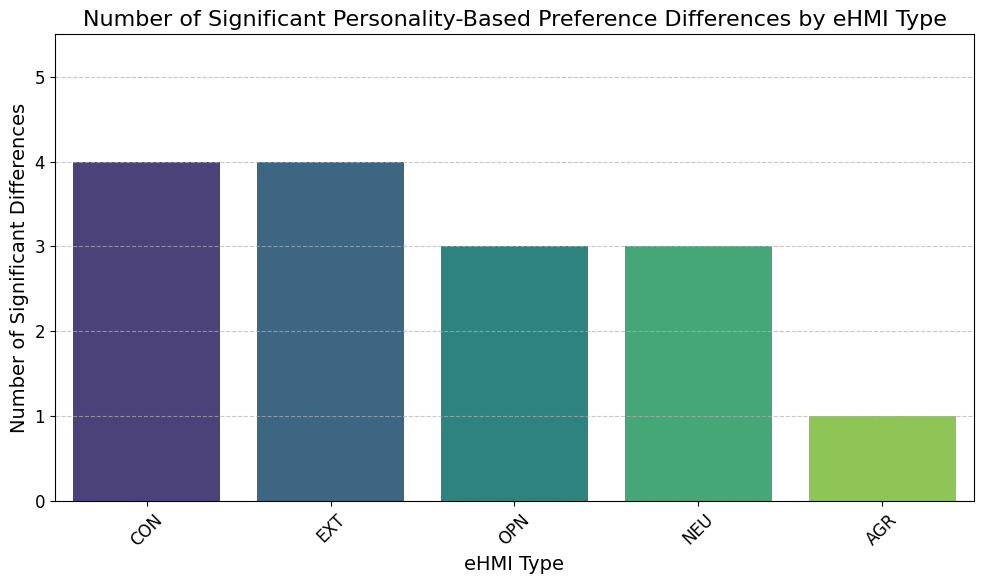


5. Creating focused visualization for the most significant interaction

Most significant interaction: Agreeableness × CON (p = 0.0000)


C:\Users\phuongnam-d\AppData\Local\Temp\ipykernel_18464\3732620746.py:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{min_trait}_Category', y='Overall', data=focus_data, palette='Set2')


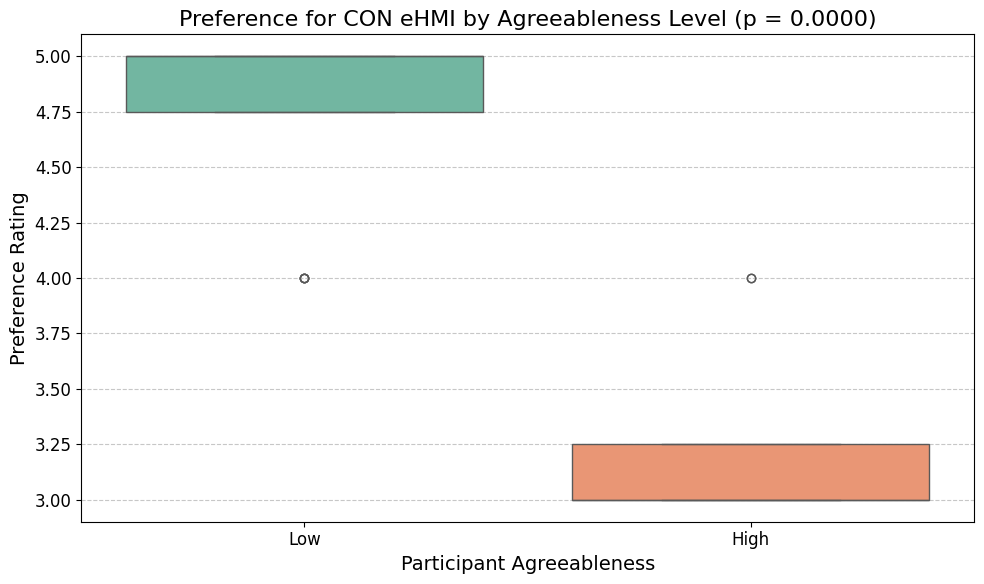

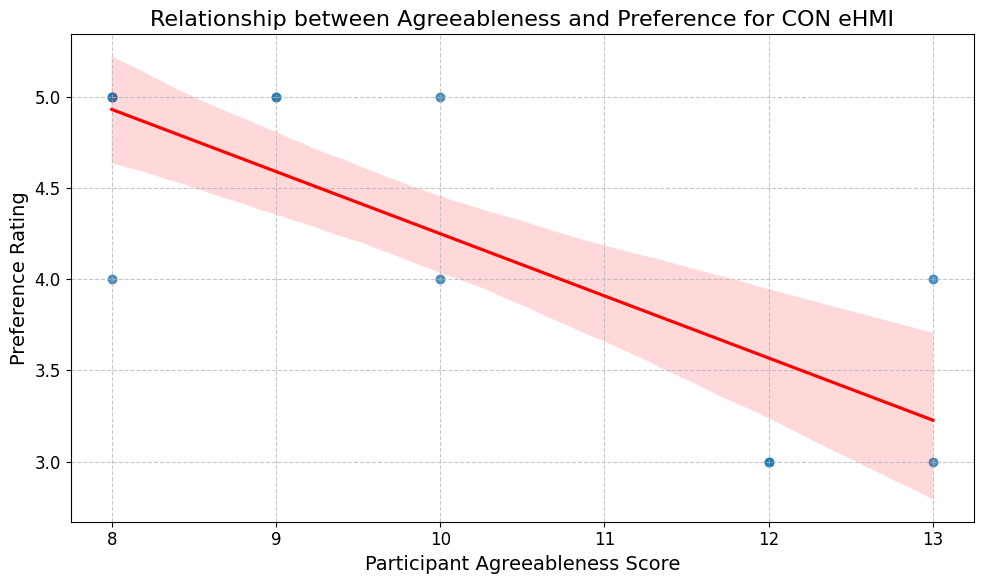


6. Creating comprehensive summary table

Comprehensive Summary Table:
     Overall Preference  High Agreeableness Preference  Low Agreeableness Preference  Agreeableness Difference  Agreeableness p-value  High Conscientiousness Preference  Low Conscientiousness Preference  Conscientiousness Difference  Conscientiousness p-value  High Extraversion Preference  Low Extraversion Preference  Extraversion Difference  Extraversion p-value  High Neuroticism Preference  Low Neuroticism Preference  Neuroticism Difference  Neuroticism p-value  High Openness Preference  Low Openness Preference  Openness Difference  Openness p-value
OPN               4.667                          4.600                         5.000                    -0.400                  0.013                              4.600                             5.000                        -0.400                      0.013                         4.600                        5.000                   -0.400                 0.090      

In [97]:
# Targeted analysis to show personality-based preferences for eHMI types
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pingouin as pg
from scipy import stats
import matplotlib.ticker as mtick

# Define the personality factors we're analyzing
personality_factors = [ 'Agreeableness', 'Conscientiousness', 'Extraversion', 'Neuroticism', 'Openness']
tipi_cols = ['TIPI 1 A', 'TIPI 1 C', 'TIPI 1 E',  'TIPI 1 N', 'TIPI 1 O']

# Set color palette for consistency across plots
color_palette = sns.color_palette("Set2", 8)
plt.rcParams.update({'font.size': 12})

print("1. Analyzing overall preference patterns for eHMI types")
# Create a summary table of preference scores by eHMI type
ehmi_preference = analysis_df.groupby('Type')['Overall'].agg(['mean', 'std', 'count']).reset_index()
ehmi_preference['sem'] = ehmi_preference['std'] / np.sqrt(ehmi_preference['count'])
ehmi_preference = ehmi_preference.sort_values('mean', ascending=False)
print(ehmi_preference)

# Plot overall preference by eHMI type
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Type', y='mean', data=ehmi_preference, 
                palette=color_palette, order=ehmi_preference['Type'])
ax.errorbar(x=range(len(ehmi_preference)), y=ehmi_preference['mean'], 
           yerr=ehmi_preference['sem'], fmt='none', c='black', capsize=5)
plt.title('Overall Preference by eHMI Voice Personality', fontsize=16)
plt.xlabel('eHMI Type Trait', fontsize=14)
plt.ylabel('Mean Preference Rating', fontsize=14)
plt.ylim(0, 5.5)  # Assuming preference is on a 0-10 scale
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./output/files/overall_ehmi_preference.png', dpi=300)
plt.show()

print("\n2. Analyzing personality-based preference differences")
# Function to categorize participants as high/low on each trait
def categorize_trait(df, trait_col):
    mean = df[trait_col].mean()
    return np.where(df[trait_col] >= mean, 'High', 'Low')

# Create preference matrices for each personality trait
preference_matrices = {}
p_values_matrices = {}

# Set up a combined figure
fig, axes = plt.subplots(3, 2, figsize=(18, 24))
axes = axes.flatten()

# Analyze and visualize each trait's relationship with eHMI preferences
for i, (trait_name, trait_col) in enumerate(zip(personality_factors, tipi_cols)):
    print(f"\n--- Analysis for {trait_name} ---")
    
    # Categorize participants as high/low on this trait
    analysis_df[f'{trait_name}_Category'] = categorize_trait(analysis_df, trait_col)
    
    # Create preference matrix
    pivot_table = analysis_df.pivot_table(
        values='Overall',
        index=f'{trait_name}_Category', 
        columns='Type',
        aggfunc='mean'
    )
    preference_matrices[trait_name] = pivot_table
    print(f"\nPreference matrix for {trait_name}:")
    print(pivot_table)
    
    # Calculate preference difference (High - Low)
    high_prefs = pivot_table.loc['High']
    low_prefs = pivot_table.loc['Low']
    diff_prefs = high_prefs - low_prefs
    print(f"\nPreference difference (High {trait_name} - Low {trait_name}):")
    print(diff_prefs)
    
    # Calculate p-values for each eHMI type
    p_values = {}
    for ehmi_type in analysis_df['Type'].unique():
        high_group = analysis_df[(analysis_df[f'{trait_name}_Category'] == 'High') & 
                               (analysis_df['Type'] == ehmi_type)]['Overall']
        low_group = analysis_df[(analysis_df[f'{trait_name}_Category'] == 'Low') & 
                              (analysis_df['Type'] == ehmi_type)]['Overall']
        
        if len(high_group) > 0 and len(low_group) > 0:
            t_stat, p_val = stats.ttest_ind(high_group, low_group)
            p_values[ehmi_type] = p_val
            star = '*' if p_val < 0.05 else ''
            print(f"{ehmi_type}: t={t_stat:.2f}, p={p_val:.4f}{star}")
        else:
            p_values[ehmi_type] = np.nan
            print(f"{ehmi_type}: Insufficient data")
            
    p_values_matrices[trait_name] = p_values
    
    # Skip the last subplot if only 5 traits
    if i < len(axes):
        ax = axes[i]
        
        # Plot preference patterns for this trait
        width = 0.35
        x = np.arange(len(pivot_table.columns))
        
        # Plot bars for High and Low trait groups
        bars1 = ax.bar(x - width/2, pivot_table.loc['High'], width, label='High', color=color_palette[0])
        bars2 = ax.bar(x + width/2, pivot_table.loc['Low'], width, label='Low', color=color_palette[1])
        
        # Add stars for significant differences
        for j, ehmi_type in enumerate(pivot_table.columns):
            if ehmi_type in p_values and p_values[ehmi_type] < 0.05:
                y_max = max(pivot_table.loc['High', ehmi_type], pivot_table.loc['Low', ehmi_type])
                ax.text(j, y_max + 0.3, '*', ha='center', va='center', fontsize=24)
        
        ax.set_title(f'Preference by {trait_name} Level', fontsize=16)
        ax.set_xlabel('eHMI Type', fontsize=14)
        ax.set_ylabel('Mean Preference Rating', fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(pivot_table.columns, rotation=45)
        ax.set_ylim(0, 5.5)  # Assuming preference is on a 0-10 scale
        ax.legend(title=f'Participant {trait_name}')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the last subplot if not used
if len(personality_factors) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('./output/files/personality_based_preferences.png', dpi=300)
plt.show()

# Create heatmap visualization of preference differences
print("\n3. Creating personality-trait preference heatmaps")

# Compile difference matrices into one dataframe
diff_matrix = pd.DataFrame()
for trait in personality_factors:
    high_vals = preference_matrices[trait].loc['High']
    low_vals = preference_matrices[trait].loc['Low']
    diff_vals = high_vals - low_vals
    diff_matrix[trait] = diff_vals

# Transpose for better visualization
diff_matrix = diff_matrix.T

# Plot heatmap of preference differences
plt.figure(figsize=(12, 8))
sns.heatmap(diff_matrix, cmap='RdBu_r', center=0, annot=True, fmt='.2f',
           cbar_kws={'label': 'Preference Difference (High - Low trait score)'})
plt.title('Preference Differences by Participant Personality Trait (High - Low)', fontsize=16)
plt.xlabel('eHMI Type', fontsize=14)
plt.ylabel('Participant Personality Trait', fontsize=14)
plt.tight_layout()
plt.savefig('./output/files/preference_difference_heatmap.png', dpi=300)
plt.show()

# Highlight significant interactions with a statistical summary table
print("\n4. Creating statistical summary table of significant interactions")

# Compile p-values into a table
p_value_df = pd.DataFrame()
for trait in ["Conscientiousness", "Extraversion", "Openness", "Agreeableness", "Neuroticism" ]:
    p_value_df[trait] = pd.Series(p_values_matrices[trait])

# Format with stars for significance
formatted_p_df = p_value_df.applymap(lambda p: f"{p:.4f}{'*' if pd.notnull(p) and p < 0.05 else ''}" if pd.notnull(p) else "NA")

# Display and save
print("\nP-values for personality trait × eHMI type interactions:")
print(formatted_p_df)
formatted_p_df.to_csv('./output/files/personality_ehmi_p_values.csv')

# Create a summary visualization of significant interactions
sig_counts = {}
for ehmi_type in analysis_df['Type'].unique():
    sig_counts[ehmi_type] = sum(1 for trait in personality_factors if 
                               ehmi_type in p_values_matrices[trait] and 
                               pd.notnull(p_values_matrices[trait][ehmi_type]) and 
                               p_values_matrices[trait][ehmi_type] < 0.05)

sig_df = pd.DataFrame.from_dict(sig_counts, orient='index', columns=['Count'])
sig_df = sig_df.sort_values('Count', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sig_df.index, y='Count', data=sig_df, palette='viridis')
plt.title('Number of Significant Personality-Based Preference Differences by eHMI Type', fontsize=16)
plt.xlabel('eHMI Type', fontsize=14)
plt.ylabel('Number of Significant Differences', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, len(personality_factors) + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./output/files/significant_interaction_summary.png', dpi=300)
plt.show()

# 5. Create a targeted visualization for the most significant interaction
print("\n5. Creating focused visualization for the most significant interaction")

# Find the most significant interaction
min_p_val = np.inf
min_trait = None
min_ehmi = None

for trait in p_values_matrices:
    for ehmi_type, p_val in p_values_matrices[trait].items():
        if pd.notnull(p_val) and p_val < min_p_val:
            min_p_val = p_val
            min_trait = trait
            min_ehmi = ehmi_type

if min_trait and min_ehmi:
    print(f"\nMost significant interaction: {min_trait} × {min_ehmi} (p = {min_p_val:.4f})")
    
    # Create detailed boxplot for this interaction
    plt.figure(figsize=(10, 6))
    focus_data = analysis_df[analysis_df['Type'] == min_ehmi]
    sns.boxplot(x=f'{min_trait}_Category', y='Overall', data=focus_data, palette='Set2')
    plt.title(f'Preference for {min_ehmi} eHMI by {min_trait} Level (p = {min_p_val:.4f})', fontsize=16)
    plt.xlabel(f'Participant {min_trait}', fontsize=14)
    plt.ylabel('Preference Rating', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'./output/files/focus_interaction_{min_trait}_{min_ehmi}.png', dpi=300)
    plt.show()
    
    # Add a scatter plot to show the continuous relationship
    plt.figure(figsize=(10, 6))
    focus_data = analysis_df[analysis_df['Type'] == min_ehmi]
    trait_col = tipi_cols[personality_factors.index(min_trait)]
    sns.regplot(x=trait_col, y='Overall', data=focus_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Relationship between {min_trait} and Preference for {min_ehmi} eHMI', fontsize=16)
    plt.xlabel(f'Participant {min_trait} Score', fontsize=14)
    plt.ylabel('Preference Rating', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'./output/files/focus_relationship_{min_trait}_{min_ehmi}.png', dpi=300)
    plt.show()

# 6. Create a comprehensive summary table
print("\n6. Creating comprehensive summary table")

# Combine all results into one table
summary_table = pd.DataFrame(index=analysis_df['Type'].unique())

# Add overall preference
mean_overall = analysis_df.groupby('Type')['Overall'].mean()
summary_table['Overall Preference'] = mean_overall

# Add preference by personality trait (High group)
for trait in personality_factors:
    high_pref = analysis_df[analysis_df[f'{trait_name}_Category'] == 'High'].groupby('Type')['Overall'].mean()
    summary_table[f'High {trait} Preference'] = high_pref
    
    low_pref = analysis_df[analysis_df[f'{trait_name}_Category'] == 'Low'].groupby('Type')['Overall'].mean()
    summary_table[f'Low {trait} Preference'] = low_pref
    
    # Add the difference
    summary_table[f'{trait} Difference'] = high_pref - low_pref
    
    # Add p-value
    if trait in p_values_matrices:
        for ehmi_type in summary_table.index:
            if ehmi_type in p_values_matrices[trait]:
                p_val = p_values_matrices[trait][ehmi_type]
                summary_table.loc[ehmi_type, f'{trait} p-value'] = p_val

# Sort by overall preference
summary_table = summary_table.sort_values('Overall Preference', ascending=False)

# Format the table
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("\nComprehensive Summary Table:")
print(summary_table.round(3))

# Save the summary table
summary_table.to_csv('./output/files/personality_preference_summary.csv')

print("\nAnalysis complete. All tables and figures have been saved to the output/files directory.")

In [ ]:
# Create a new DataFrame with the specified columns
export_df = pd.DataFrame()

# Add a unique identifier for each row as the first column
export_df['id'] = range(0, len(analysis_df))

# Add participant ID
export_df['ParticipantID'] = analysis_df['Participant ID']

# Define personality levels based on population means, not median splits
# First, calculate the mean for each trait across all participants
personality_means = {
    'EXT': analysis_df['TIPI 1 E'].mean(),
    'AGR': analysis_df['TIPI 1 A'].mean(),
    'CON': analysis_df['TIPI 1 C'].mean(),
    'NEU': analysis_df['TIPI 1 N'].mean(),
    'OPN': analysis_df['TIPI 1 O'].mean()
}

# Create level columns based on comparison with population means
export_df['EXT level'] = np.where(analysis_df['TIPI 1 E'] >= personality_means['EXT'], 'High', 'Low')
export_df['AGR level'] = np.where(analysis_df['TIPI 1 A'] >= personality_means['AGR'], 'High', 'Low')
export_df['CON level'] = np.where(analysis_df['TIPI 1 C'] >= personality_means['CON'], 'High', 'Low')
export_df['NEU level'] = np.where(analysis_df['TIPI 1 N'] >= personality_means['NEU'], 'High', 'Low')
export_df['OPN level'] = np.where(analysis_df['TIPI 1 O'] >= personality_means['OPN'], 'High', 'Low')

# Add eHMI information with format "eHMI-Strong personality"
export_df['eHMI'] = analysis_df.apply(
    lambda row: f"eHMI_{row['Type']}", 
    axis=1
)

# Add Overall preference score
export_df['Overall'] = analysis_df['Overall']

# Print summary of the data
print("Personality trait means used for High/Low classification:")
for trait, mean_value in personality_means.items():
    print(f"{trait}: {mean_value:.2f}")
    
print("\nDistribution of personality levels:")
for trait in ['EXT', 'AGR', 'CON', 'NEU', 'OPN']:
    counts = export_df[f'{trait} level'].value_counts()
    print(f"{trait} levels: {dict(counts)}")
    
print("\nFirst few rows of the export DataFrame:")
print(export_df.head())

# Export to CSV
export_df.to_csv("./output/files/personality_ehmi_preferences.csv", index=False)
print("\nExported DataFrame to './output/files/personality_ehmi_preferences.csv'")

Personality trait means used for High/Low classification:
EXT: 9.70
AGR: 10.30
CON: 11.20
NEU: 4.30
OPN: 11.80

Distribution of personality levels:
EXT levels: {'High': 72, 'Low': 48}
AGR levels: {'Low': 60, 'High': 60}
CON levels: {'High': 72, 'Low': 48}
NEU levels: {'High': 60, 'Low': 60}
OPN levels: {'High': 84, 'Low': 36}

First few rows of the export DataFrame:
   id ParticipantID EXT level AGR level CON level NEU level OPN level      eHMI  Overall
0   0            P1      High       Low       Low      High      High  eHMI_CON        4
1   1            P1      High       Low       Low      High      High  eHMI_CON        4
2   2            P1      High       Low       Low      High      High  eHMI_CON        5
3   3            P1      High       Low       Low      High      High  eHMI_CON        5
4   4            P1      High       Low       Low      High      High  eHMI_EXT        3

Exported DataFrame to './output/files/personality_ehmi_preferences.csv'


## Spider graph

In [17]:
analysis_df = pd.read_csv('./output/processed_data/database_df.csv')
analysis_df.columns

Index(['Participant ID', 'Student ID', 'Name', 'Participant Gender',
       'Nationality', 'TIPI 1 O', 'TIPI 1 C', 'TIPI 1 E', 'TIPI 1 A',
       'TIPI 1 N', 'Condition', 'eHMI_ID', 'Type', 'eHMI Gender', 'EXT', 'AGR',
       'CON', 'NEU', 'OPN', 'Encounter', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5',
       'BFI O', 'BFI C', 'BFI E', 'BFI A', 'BFI N', 'Overall', 'VQ1', 'VQ2',
       'VQ3', 'VQ4', 'VQ5', 'VQ6', 'VQ7', 'VQ8', 'VQ9', 'VQ10', 'VQ11', 'VQ12',
       'VQ13', 'VQ14', 'VQ15', 'VQ16'],
      dtype='object')

In [31]:
# Create radar charts of participant personality profiles by eHMI type and Overall score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.gridspec as gridspec
import pandas as pd
import os
plt.style.use('default')

# Ensure output directories exist
os.makedirs('./output/figures/spider_charts', exist_ok=True)

# Define the personality traits for the radar chart
traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
trait_cols = ['TIPI 1 O', 'TIPI 1 C', 'TIPI 1 E', 'TIPI 1 A', 'TIPI 1 N']
num_traits = len(traits)

# Function to create a radar chart
def create_radar_chart(ax, angles, values, std_values, title=None, color='blue'):
    # Plot the actual values
    values = np.concatenate((values, [values[0]]))  # Close the polygon
    std_upper = np.concatenate(([v + s for v, s in zip(values[:-1], std_values)], [values[0] + std_values[0]]))
    std_lower = np.concatenate(([v - s for v, s in zip(values[:-1], std_values)], [values[0] - std_values[0]]))
    
    # Draw the axes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(traits)
    
    # Plot data
    ax.plot(angles, values, 'o-', linewidth=2, color=color, label='Mean')
    
    # Fill +/- std shading
    ax.fill_between(angles, std_lower, std_upper, alpha=0.25, color=color, label='±1 SD')
    
    # Set y limits
    ax.set_ylim(0.5, 14.5)  # TIPI scores are 1-14
    
    if title:
        ax.set_title(title, y=1.05, pad=10, fontdict={'fontsize': 14})
    
    return ax

# First, create Overall score bins
# Per the user's requirement, bin Overall scores into 5 categories (1-5)
analysis_df['Overall_Bin'] = pd.cut(
    analysis_df['Overall'], 
    bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
    labels=['1', '2', '3', '4', '5'],
    include_lowest=True
)

# Get unique eHMI types and Overall bins
ehmi_types = analysis_df['Type'].unique()
overall_bins = ['1', '2', '3', '4', '5']

# Check how many data points we have for each combination
cross_tab = pd.crosstab(analysis_df['Type'], analysis_df['Overall_Bin'])
print(
    "Distribution of ratings by Type and Overall score:")
print(cross_tab)

# Set up angles for radar chart
angles = np.linspace(0, 2*np.pi, num_traits, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Define color palette for consistency across types
type_colors = {
    ehmi_type: plt.cm.tab10(i) 
    for i, ehmi_type in enumerate(ehmi_types)
}

# Set up for all 25 charts (5 types × 5 scores)
# We'll create separate files for each eHMI type to avoid too much clutter
for ehmi_type in ehmi_types:
    # Create a figure with 5 subplots (one for each Overall score bin)
    fig = plt.figure(figsize=(20, 15))
    
    # Create a title for the figure
    fig.suptitle(f'Participant Personality Profiles for eHMI Type: {ehmi_type}', fontsize=20)
    
    # Create subplots
    for i, score_bin in enumerate(overall_bins):
        # Check if we have data for this combination
        subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                           (analysis_df['Overall_Bin'] == score_bin)]
        n_samples = len(subset)
        
        # Create subplot
        ax = plt.subplot(2, 3, i+1, polar=True)
        
        if n_samples > 0:  # Only plot if we have data
            # Calculate mean and std for each trait
            trait_means = [subset[col].mean() for col in trait_cols]
            trait_stds = [subset[col].std() for col in trait_cols]
            
            # Create the radar chart
            create_radar_chart(
                ax, angles, trait_means, trait_stds, 
                title=f'Overall Score: {score_bin} (n={n_samples})',
                color=type_colors[ehmi_type]
            )
        else:
            # If no data, just show an empty plot with a message
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(traits)
            ax.set_ylim(0.5, 14.5) # 1-14
            ax.set_title(f'Overall Score: {score_bin} (n=0)')
            ax.text(0, 0, "No Data", 
                   ha='center', va='center', 
                   fontsize=16)
    
    plt.tight_layout()  # Adjust layout to make room for the figure title
    plt.savefig(f'./output/figures/spider_charts/personality_radar_type_{ehmi_type}.png', dpi=300)
    plt.close()

# Now create a master view with all combinations in one giant grid
# This will be a 5×5 grid (Types × Overall scores)
fig = plt.figure(figsize=(30, 25))
gs = gridspec.GridSpec(5, 5, figure=fig)

# Add an overall title
fig.suptitle('Participant Personality Profiles by eHMI Type and Overall Rating', fontsize=20, y=1.0)

# Create a radar chart for each combination
for i, ehmi_type in enumerate(ehmi_types):
    for j, score_bin in enumerate(overall_bins):
        # Check if we have data for this combination
        subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                           (analysis_df['Overall_Bin'] == score_bin)]
        n_samples = len(subset)
        
        # Create subplot
        ax = fig.add_subplot(gs[i, j], polar=True)
        
        if n_samples > 0:  # Only plot if we have data
            # Calculate mean and std for each trait
            trait_means = [subset[col].mean() for col in trait_cols]
            trait_stds = [subset[col].std() for col in trait_cols]
            
            # Create the radar chart
            create_radar_chart(
                ax, angles, trait_means, trait_stds, 
                title=f'Type: {ehmi_type}, Score: {score_bin} (n={n_samples})',
                color=type_colors[ehmi_type]
            )
        else:
            # If no data, just show an empty plot with a message
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(traits)
            ax.set_ylim(0.5, 14.5) # 1-14
            ax.set_title(f'Type: {ehmi_type}, Score: {score_bin} (n=0)')
            ax.text(0, 0, "No Data", 
                   ha='center', va='center', 
                   fontsize=12)

# Add row and column labels
for i, ehmi_type in enumerate(ehmi_types):
    fig.text(0.02, 0.85 - (i * 0.17), f'Type: {ehmi_type}', 
            fontsize=16, rotation=90, ha='center', va='center')

for j, score_bin in enumerate(overall_bins):
    fig.text(0.12 + (j * 0.175), 0.97, f'Overall Score: {score_bin}', 
            fontsize=16, ha='center', va='center')

plt.tight_layout()  # Adjust layout to make room for the figure title and labels
plt.savefig('./output/figures/spider_charts/personality_radar_all_combinations.png', dpi=300)
plt.close()

# Create an additional summary chart showing the trend of personality traits
# by Overall score for each eHMI type
traits_summary = {}
for ehmi_type in ehmi_types:
    traits_summary[ehmi_type] = {}
    
    # For each trait, plot a line showing how it changes with Overall score
    for trait_name, trait_col in zip(traits, trait_cols):
        # Calculate mean trait value for each Overall score bin
        trait_by_score = []
        score_counts = []
        
        for score_bin in overall_bins:
            subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                               (analysis_df['Overall_Bin'] == score_bin)]
            if len(subset) > 0:
                trait_by_score.append(subset[trait_col].mean())
                score_counts.append(len(subset))
            else:
                trait_by_score.append(np.nan)
                score_counts.append(0)
        
        traits_summary[ehmi_type][trait_name] = {
            'means': trait_by_score,
            'counts': score_counts
        }

# Plot the trends for each eHMI type
for ehmi_type in ehmi_types:
    plt.figure(figsize=(12, 8))
    
    # Plot each trait as a line
    for trait_name in traits:
        means = traits_summary[ehmi_type][trait_name]['means']
        counts = traits_summary[ehmi_type][trait_name]['counts']
        
        # Only plot if we have enough data points (at least 3 valid means)
        if sum(~np.isnan(means)) >= 3:
            plt.plot(overall_bins, means, 'o-', linewidth=2, label=trait_name)
    
    plt.title(f'Trend of Participant Personality Traits by Overall Rating - Type: {ehmi_type}', fontsize=16)
    plt.xlabel('Overall Rating', fontsize=14)
    plt.ylabel('Mean Personality Trait Score', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Personality Trait')
    plt.ylim(0.5, 14.5)  # TIPI is 1-14 scale
    
    plt.tight_layout()
    plt.savefig(f'./output/figures/spider_charts/trait_trends_type_{ehmi_type}.png', dpi=300)
    plt.close()

print("Generated all spider charts for eHMI Type × Overall score combinations")

Distribution of ratings by Type and Overall score:
Overall_Bin  1   2   3   4   5
Type                          
AGR          4   6  12   6   4
CON          0   4   8  10  14
EXT          2  10   8   6   2
NEU          2   2   4  14   6
OPN          0   0   2  12  18
Generated all spider charts for eHMI Type × Overall score combinations


In [23]:
# Create personality radar charts for all combinations - male and female separately
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd
import os
plt.style.use('default')

# Ensure output directories exist
os.makedirs('./output/figures/spider_charts', exist_ok=True)

# Define the personality traits for the radar chart
traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
trait_cols = ['TIPI 1 O', 'TIPI 1 C', 'TIPI 1 E', 'TIPI 1 A', 'TIPI 1 N']
num_traits = len(traits)

# Function to create a radar chart
def create_radar_chart(ax, angles, values, std_values=None, title=None, color='blue', alpha=0.25, label=None):
    # Plot the actual values
    values = np.concatenate((values, [values[0]]))  # Close the polygon
    
    # Draw the axes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(traits)
    
    # Plot data
    ax.plot(angles, values, 'o-', linewidth=2, color=color, label=label if label else 'Mean')
    
    # Fill +/- std shading if provided
    if std_values is not None:
        std_upper = np.concatenate(([v + s for v, s in zip(values[:-1], std_values)], [values[0] + std_values[0]]))
        std_lower = np.concatenate(([v - s for v, s in zip(values[:-1], std_values)], [values[0] - std_values[0]]))
        ax.fill_between(angles, std_lower, std_upper, alpha=alpha, color=color, label='±1 SD')
    
    # Set y limits
    ax.set_ylim(0, 7)  # TIPI scores are typically 1-7
    
    if title:
        ax.set_title(title)
    
    return ax

# First, check that Overall scores are in the right range (expected 1-5 scale)
print("Overall score range:", analysis_df['Overall'].min(), "to", analysis_df['Overall'].max())

# Create Overall score bins (1-5)
analysis_df['Overall_Bin'] = pd.cut(
    analysis_df['Overall'], 
    bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
    labels=['1', '2', '3', '4', '5'],
    include_lowest=True
)

# Get unique eHMI types, genders, and Overall bins
ehmi_types = analysis_df['Type'].unique()
ehmi_genders = analysis_df['eHMI Gender'].unique()
overall_bins = ['1', '2', '3', '4', '5']

# Print basic stats on distribution
print("\nDistribution of ratings by eHMI Gender:")
print(analysis_df['eHMI Gender'].value_counts())

print("\nDistribution of ratings by Type:")
print(analysis_df['Type'].value_counts())

print("\nDistribution of ratings by Overall Bin:")
print(analysis_df['Overall_Bin'].value_counts())

# Check combined distribution
print("\nDistribution by Type × Gender × Overall:")
cross_tab = pd.crosstab(
    [analysis_df['Type'], analysis_df['eHMI Gender']], 
    analysis_df['Overall_Bin']
)
print(cross_tab)

# Set up angles for radar chart
angles = np.linspace(0, 2*np.pi, num_traits, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Define color palette for consistency
type_colors = plt.cm.tab10(np.linspace(0, 1, len(ehmi_types)))
type_color_map = {t: type_colors[i] for i, t in enumerate(ehmi_types)}

score_colors = plt.cm.viridis(np.linspace(0, 1, len(overall_bins)))
score_color_map = {s: score_colors[i] for i, s in enumerate(overall_bins)}

# Create separate comprehensive charts for male and female eHMIs

# 1. MALE EHMI VOICES ANALYSIS
# =================================================
print("\nGenerating Male eHMI Personality Charts")

# A. Male: Type comparison for each score bin
for score_bin in overall_bins:
    plt.figure(figsize=(15, 12))
    ax = plt.subplot(111, polar=True)
    
    # Plot each eHMI type for this score bin
    has_data = False
    for i, ehmi_type in enumerate(ehmi_types):
        subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                           (analysis_df['eHMI Gender'] == 'Male') &
                           (analysis_df['Overall_Bin'] == score_bin)]
        
        n_samples = len(subset)
        if n_samples >= 5:  # Only plot if we have sufficient data
            has_data = True
            # Calculate means for each trait
            trait_means = [subset[col].mean() for col in trait_cols]
            trait_stds = [subset[col].std() for col in trait_cols]
            
            # Create radar chart
            create_radar_chart(
                ax, angles, trait_means, trait_stds, 
                color=type_color_map[ehmi_type], 
                label=f'{ehmi_type} (n={n_samples})'
            )
    
    if has_data:
        plt.title(f'Male eHMI - Personality Profiles for Rating: {score_bin}', fontsize=18)
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plt.tight_layout()
        plt.savefig(f'./output/figures/spider_charts/male_score_{score_bin}_all_types.png', dpi=300)
    plt.close()

# B. Male: Score comparison for each eHMI type
for ehmi_type in ehmi_types:
    plt.figure(figsize=(15, 12))
    ax = plt.subplot(111, polar=True)
    
    # Plot each score bin for this eHMI type
    has_data = False
    for i, score_bin in enumerate(overall_bins):
        subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                           (analysis_df['eHMI Gender'] == 'Male') &
                           (analysis_df['Overall_Bin'] == score_bin)]
        
        n_samples = len(subset)
        if n_samples >= 5:  # Only plot if we have sufficient data
            has_data = True
            # Calculate means for each trait
            trait_means = [subset[col].mean() for col in trait_cols]
            trait_stds = [subset[col].std() for col in trait_cols]
            
            # Create radar chart
            create_radar_chart(
                ax, angles, trait_means, trait_stds, 
                color=score_color_map[score_bin], 
                label=f'Rating {score_bin} (n={n_samples})'
            )
    
    if has_data:
        plt.title(f'Male eHMI - Type: {ehmi_type} - Personality Profiles by Rating', fontsize=18)
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plt.tight_layout()
        plt.savefig(f'./output/figures/spider_charts/male_type_{ehmi_type}_all_scores.png', dpi=300)
    plt.close()

# C. Male: High vs Low preference comparison for each type
for ehmi_type in ehmi_types:
    plt.figure(figsize=(15, 12))
    ax = plt.subplot(111, polar=True)
    
    # High preference (4-5)
    high_subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                            (analysis_df['eHMI Gender'] == 'Male') &
                            (analysis_df['Overall_Bin'].isin(['4', '5']))]
    
    # Low preference (1-2)
    low_subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                           (analysis_df['eHMI Gender'] == 'Male') &
                           (analysis_df['Overall_Bin'].isin(['1', '2']))]
    
    has_data = False
    
    # Plot high preference if we have data
    if len(high_subset) >= 5:
        has_data = True
        trait_means = [high_subset[col].mean() for col in trait_cols]
        trait_stds = [high_subset[col].std() for col in trait_cols]
        
        create_radar_chart(
            ax, angles, trait_means, trait_stds, 
            color='green', label=f'High Rating (n={len(high_subset)})'
        )
    
    # Plot low preference if we have data
    if len(low_subset) >= 5:
        has_data = True
        trait_means = [low_subset[col].mean() for col in trait_cols]
        trait_stds = [low_subset[col].std() for col in trait_cols]
        
        create_radar_chart(
            ax, angles, trait_means, trait_stds, 
            color='red', label=f'Low Rating (n={len(low_subset)})'
        )
    
    if has_data:
        plt.title(f'Male eHMI - Type: {ehmi_type} - High vs Low Rating Comparison', fontsize=18)
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plt.tight_layout()
        plt.savefig(f'./output/figures/spider_charts/male_type_{ehmi_type}_high_vs_low.png', dpi=300)
    plt.close()

# 2. FEMALE EHMI VOICES ANALYSIS
# =================================================
print("\nGenerating Female eHMI Personality Charts")

# A. Female: Type comparison for each score bin
for score_bin in overall_bins:
    plt.figure(figsize=(15, 12))
    ax = plt.subplot(111, polar=True)
    
    # Plot each eHMI type for this score bin
    has_data = False
    for i, ehmi_type in enumerate(ehmi_types):
        subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                           (analysis_df['eHMI Gender'] == 'Female') &
                           (analysis_df['Overall_Bin'] == score_bin)]
        
        n_samples = len(subset)
        if n_samples >= 5:  # Only plot if we have sufficient data
            has_data = True
            # Calculate means for each trait
            trait_means = [subset[col].mean() for col in trait_cols]
            trait_stds = [subset[col].std() for col in trait_cols]
            
            # Create radar chart
            create_radar_chart(
                ax, angles, trait_means, trait_stds, 
                color=type_color_map[ehmi_type], 
                label=f'{ehmi_type} (n={n_samples})'
            )
    
    if has_data:
        plt.title(f'Female eHMI - Personality Profiles for Rating: {score_bin}', fontsize=18)
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plt.tight_layout()
        plt.savefig(f'./output/figures/spider_charts/female_score_{score_bin}_all_types.png', dpi=300)
    plt.close()

# B. Female: Score comparison for each eHMI type
for ehmi_type in ehmi_types:
    plt.figure(figsize=(15, 12))
    ax = plt.subplot(111, polar=True)
    
    # Plot each score bin for this eHMI type
    has_data = False
    for i, score_bin in enumerate(overall_bins):
        subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                           (analysis_df['eHMI Gender'] == 'Female') &
                           (analysis_df['Overall_Bin'] == score_bin)]
        
        n_samples = len(subset)
        if n_samples >= 5:  # Only plot if we have sufficient data
            has_data = True
            # Calculate means for each trait
            trait_means = [subset[col].mean() for col in trait_cols]
            trait_stds = [subset[col].std() for col in trait_cols]
            
            # Create radar chart
            create_radar_chart(
                ax, angles, trait_means, trait_stds, 
                color=score_color_map[score_bin], 
                label=f'Rating {score_bin} (n={n_samples})'
            )
    
    if has_data:
        plt.title(f'Female eHMI - Type: {ehmi_type} - Personality Profiles by Rating', fontsize=18)
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plt.tight_layout()
        plt.savefig(f'./output/figures/spider_charts/female_type_{ehmi_type}_all_scores.png', dpi=300)
    plt.close()

# C. Female: High vs Low preference comparison for each type
for ehmi_type in ehmi_types:
    plt.figure(figsize=(15, 12))
    ax = plt.subplot(111, polar=True)
    
    # High preference (4-5)
    high_subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                            (analysis_df['eHMI Gender'] == 'Female') &
                            (analysis_df['Overall_Bin'].isin(['4', '5']))]
    
    # Low preference (1-2)
    low_subset = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                           (analysis_df['eHMI Gender'] == 'Female') &
                           (analysis_df['Overall_Bin'].isin(['1', '2']))]
    
    has_data = False
    
    # Plot high preference if we have data
    if len(high_subset) >= 5:
        has_data = True
        trait_means = [high_subset[col].mean() for col in trait_cols]
        trait_stds = [high_subset[col].std() for col in trait_cols]
        
        create_radar_chart(
            ax, angles, trait_means, trait_stds, 
            color='green', label=f'High Rating (n={len(high_subset)})'
        )
    
    # Plot low preference if we have data
    if len(low_subset) >= 5:
        has_data = True
        trait_means = [low_subset[col].mean() for col in trait_cols]
        trait_stds = [low_subset[col].std() for col in trait_cols]
        
        create_radar_chart(
            ax, angles, trait_means, trait_stds, 
            color='red', label=f'Low Rating (n={len(low_subset)})'
        )
    
    if has_data:
        plt.title(f'Female eHMI - Type: {ehmi_type} - High vs Low Rating Comparison', fontsize=18)
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plt.tight_layout()
        plt.savefig(f'./output/figures/spider_charts/female_type_{ehmi_type}_high_vs_low.png', dpi=300)
    plt.close()

# 3. DIRECT MALE VS FEMALE COMPARISON CHARTS
# =================================================
print("\nGenerating Male vs Female Comparison Charts")

# Most informative comparison: High-rated profiles by type
plt.figure(figsize=(15, 12))
    
# Create a summary chart showing high-rated personality profiles by gender and type
for ehmi_type in ehmi_types:
    plt.figure(figsize=(15, 12))
    ax = plt.subplot(111, polar=True)
    
    has_data = False
    
    # Male high-rated
    male_high = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                          (analysis_df['eHMI Gender'] == 'Male') &
                          (analysis_df['Overall_Bin'].isin(['4', '5']))]
    
    # Female high-rated
    female_high = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                            (analysis_df['eHMI Gender'] == 'Female') &
                            (analysis_df['Overall_Bin'].isin(['4', '5']))]
    
    # Plot male data if available
    if len(male_high) >= 5:
        has_data = True
        trait_means = [male_high[col].mean() for col in trait_cols]
        trait_stds = [male_high[col].std() for col in trait_cols]
        
        create_radar_chart(
            ax, angles, trait_means, trait_stds, 
            color='blue', label=f'Male (n={len(male_high)})'
        )
    
    # Plot female data if available
    if len(female_high) >= 5:
        has_data = True
        trait_means = [female_high[col].mean() for col in trait_cols]
        trait_stds = [female_high[col].std() for col in trait_cols]
        
        create_radar_chart(
            ax, angles, trait_means, trait_stds, 
            color='purple', label=f'Female (n={len(female_high)})'
        )
    
    if has_data:
        plt.title(f'Type: {ehmi_type} - High-Rated Male vs Female eHMI', fontsize=18)
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plt.tight_layout()
        plt.savefig(f'./output/figures/spider_charts/gender_comparison_type_{ehmi_type}_high_rated.png', dpi=300)
    plt.close()

# 4. SUMMARY DASHBOARD - ALL TYPES
# =================================================
print("\nGenerating Summary Dashboard")

# Create composite graph showing preferences by participant personality type
fig, axes = plt.subplots(1, 2, figsize=(24, 12), subplot_kw={'polar': True})

# Male summary - high-rated across all types
ax = axes[0]
for ehmi_type in ehmi_types:
    male_high = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                          (analysis_df['eHMI Gender'] == 'Male') &
                          (analysis_df['Overall_Bin'].isin(['4', '5']))]
    
    if len(male_high) >= 10:  # More data required for summary
        trait_means = [male_high[col].mean() for col in trait_cols]
        
        create_radar_chart(
            ax, angles, trait_means, None,
            color=type_color_map[ehmi_type], 
            label=f'{ehmi_type} (n={len(male_high)})',
            alpha=0.15  # Less opacity since we're not showing std
        )
ax.set_title('Male eHMI - High-Rated Personality Profiles by Type', fontsize=18)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# Female summary - high-rated across all types
ax = axes[1]
for ehmi_type in ehmi_types:
    female_high = analysis_df[(analysis_df['Type'] == ehmi_type) & 
                            (analysis_df['eHMI Gender'] == 'Female') &
                            (analysis_df['Overall_Bin'].isin(['4', '5']))]
    
    if len(female_high) >= 10:
        trait_means = [female_high[col].mean() for col in trait_cols]
        
        create_radar_chart(
            ax, angles, trait_means, None,
            color=type_color_map[ehmi_type], 
            label=f'{ehmi_type} (n={len(female_high)})',
            alpha=0.15
        )
ax.set_title('Female eHMI - High-Rated Personality Profiles by Type', fontsize=18)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.suptitle('Summary of High-Rated Personality Profiles by Gender and Type', fontsize=22)
plt.tight_layout()
plt.savefig('./output/figures/spider_charts/summary_gender_type_comparison.png', dpi=300)
plt.close()

print("All personality radar charts successfully generated!")

# Create a table summarizing the sample sizes for reference
sample_sizes = pd.DataFrame(index=ehmi_types, columns=[])

# Add columns for Male and Female, High and Low rated
for gender in ehmi_genders:
    for rating_group in ['High (4-5)', 'Low (1-2)']:
        col_name = f'{gender} {rating_group}'
        if rating_group == 'High (4-5)':
            bins = ['4', '5']
        else:
            bins = ['1', '2']
            
        # Calculate sample sizes
        sample_sizes[col_name] = [
            len(analysis_df[(analysis_df['Type'] == t) & 
                          (analysis_df['eHMI Gender'] == gender) &
                          (analysis_df['Overall_Bin'].isin(bins))])
            for t in ehmi_types
        ]

print("\nSample sizes for each gender, type, and rating group:")
print(sample_sizes)

# Save to CSV for reference
sample_sizes.to_csv('./output/figures/spider_charts/sample_sizes.csv')

Overall score range: 1 to 5

Distribution of ratings by eHMI Gender:
eHMI Gender
Male      78
Female    78
Name: count, dtype: int64

Distribution of ratings by Type:
Type
CON    36
OPN    32
AGR    32
EXT    28
NEU    28
Name: count, dtype: int64

Distribution of ratings by Overall Bin:
Overall_Bin
4    48
5    44
3    34
2    22
1     8
Name: count, dtype: int64

Distribution by Type × Gender × Overall:
Overall_Bin       1  2  3   4   5
Type eHMI Gender                 
AGR  Female       4  4  6   2   0
     Male         0  2  6   4   4
CON  Female       0  2  2   4  10
     Male         0  2  6   6   4
EXT  Female       0  8  2   4   0
     Male         2  2  6   2   2
NEU  Female       0  0  2  10   2
     Male         2  2  2   4   4
OPN  Female       0  0  2   4  10
     Male         0  0  0   8   8

Generating Male eHMI Personality Charts

Generating Female eHMI Personality Charts

Generating Male vs Female Comparison Charts

Generating Summary Dashboard
All personality radar ch

<Figure size 1500x1200 with 0 Axes>

In [26]:
# Create personality radar charts for male and female participants separately
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd
import os
plt.style.use('default')

# Ensure output directories exist
os.makedirs('./output/figures/spider_charts/participant_gender', exist_ok=True)

# Define the personality traits for the radar chart
traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
trait_cols = ['TIPI 1 O', 'TIPI 1 C', 'TIPI 1 E', 'TIPI 1 A', 'TIPI 1 N']
num_traits = len(traits)

# Check if participant gender information is available
if 'Gender' in analysis_df.columns:
    participant_gender_col = 'Gender'
elif 'Participant Gender' in analysis_df.columns:
    participant_gender_col = 'Participant Gender'
else:
    print("Participant gender information not found in the dataframe.")
    print("Available columns:", analysis_df.columns.tolist())
    participant_gender_col = None

if participant_gender_col is not None:
    # Function to create a radar chart
    def create_radar_chart(ax, angles, values, std_values=None, title=None, color='blue', alpha=0.25, label=None):
        # Plot the actual values
        values = np.concatenate((values, [values[0]]))  # Close the polygon
        
        # Draw the axes
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(traits)
        
        # Plot data
        ax.plot(angles, values, 'o-', linewidth=2, color=color, label=label if label else 'Mean')
        
        # Fill +/- std shading if provided
        if std_values is not None:
            std_upper = np.concatenate(([v + s for v, s in zip(values[:-1], std_values)], [values[0] + std_values[0]]))
            std_lower = np.concatenate(([v - s for v, s in zip(values[:-1], std_values)], [values[0] - std_values[0]]))
            ax.fill_between(angles, std_lower, std_upper, alpha=alpha, color=color, label='±1 SD')
        
        # Set y limits
        ax.set_ylim(0.5, 14.5)  # TIPI scores are typically 1-14
        
        if title:
            ax.set_title(title)
        
        return ax

    # First, check and create Overall score bins if not already created
    if 'Overall_Bin' not in analysis_df.columns:
        analysis_df['Overall_Bin'] = pd.cut(
            analysis_df['Overall'], 
            bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
            labels=['1', '2', '3', '4', '5'],
            include_lowest=True
        )

    # Get unique eHMI types and Overall bins
    ehmi_types = analysis_df['Type'].unique()
    overall_bins = ['1', '2', '3', '4', '5']
    participant_genders = analysis_df[participant_gender_col].unique()
    
    # Set up angles for radar chart
    angles = np.linspace(0, 2*np.pi, num_traits, endpoint=False).tolist()
    angles += angles[:1]  # Close the circle
    
    # Define color palette for consistency
    type_colors = plt.cm.tab10(np.linspace(0, 1, len(ehmi_types)))
    type_color_map = {t: type_colors[i] for i, t in enumerate(ehmi_types)}
    
    score_colors = plt.cm.viridis(np.linspace(0, 1, len(overall_bins)))
    score_color_map = {s: score_colors[i] for i, s in enumerate(overall_bins)}
    
    # Print distribution information
    print(f"\nParticipant gender distribution:")
    print(analysis_df[participant_gender_col].value_counts())
    
    print("\nCross-tabulation of participant gender by eHMI type:")
    print(pd.crosstab(analysis_df[participant_gender_col], analysis_df['Type']))
    
    print("\nCross-tabulation of participant gender by eHMI gender:")
    if 'eHMI Gender' in analysis_df.columns:
        print(pd.crosstab(analysis_df[participant_gender_col], analysis_df['eHMI Gender']))
    
    # Process for each participant gender
    for participant_gender in participant_genders:
        print(f"\nGenerating charts for {participant_gender} participants")
        
        # Filter data for this participant gender
        gender_df = analysis_df[analysis_df[participant_gender_col] == participant_gender]
        
        # 1. Type comparison for each score bin
        for score_bin in overall_bins:
            plt.figure(figsize=(15, 12))
            ax = plt.subplot(111, polar=True)
            
            # Plot each eHMI type for this score bin
            has_data = False
            for i, ehmi_type in enumerate(ehmi_types):
                subset = gender_df[(gender_df['Type'] == ehmi_type) & 
                                  (gender_df['Overall_Bin'] == score_bin)]
                
                n_samples = len(subset)
                if n_samples >= 3:  # Only plot if we have sufficient data
                    has_data = True
                    # Calculate means for each trait
                    trait_means = [subset[col].mean() for col in trait_cols]
                    trait_stds = [subset[col].std() for col in trait_cols]
                    
                    # Create radar chart
                    create_radar_chart(
                        ax, angles, trait_means, trait_stds, 
                        color=type_color_map[ehmi_type], 
                        label=f'{ehmi_type} (n={n_samples})'
                    )
            
            if has_data:
                plt.title(f'{participant_gender} Participants - Personality Profiles for Rating: {score_bin}', fontsize=18)
                plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
                plt.tight_layout()
                plt.savefig(f'./output/figures/spider_charts/participant_gender/{participant_gender}_score_{score_bin}_all_types.png', dpi=300)
            plt.close()
        
        # 2. Score comparison for each eHMI type
        for ehmi_type in ehmi_types:
            plt.figure(figsize=(15, 12))
            ax = plt.subplot(111, polar=True)
            
            # Plot each score bin for this eHMI type
            has_data = False
            for i, score_bin in enumerate(overall_bins):
                subset = gender_df[(gender_df['Type'] == ehmi_type) & 
                                  (gender_df['Overall_Bin'] == score_bin)]
                
                n_samples = len(subset)
                if n_samples >= 3:  # Only plot if we have sufficient data
                    has_data = True
                    # Calculate means for each trait
                    trait_means = [subset[col].mean() for col in trait_cols]
                    trait_stds = [subset[col].std() for col in trait_cols]
                    
                    # Create radar chart
                    create_radar_chart(
                        ax, angles, trait_means, trait_stds, 
                        color=score_color_map[score_bin], 
                        label=f'Rating {score_bin} (n={n_samples})'
                    )
            
            if has_data:
                plt.title(f'{participant_gender} Participants - Type: {ehmi_type} - Personality Profiles by Rating', fontsize=18)
                plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
                plt.tight_layout()
                plt.savefig(f'./output/figures/spider_charts/participant_gender/{participant_gender}_type_{ehmi_type}_all_scores.png', dpi=300)
            plt.close()
        
        # 3. High vs Low preference comparison for each type
        for ehmi_type in ehmi_types:
            plt.figure(figsize=(15, 12))
            ax = plt.subplot(111, polar=True)
            
            # High preference (4-5)
            high_subset = gender_df[(gender_df['Type'] == ehmi_type) & 
                                  (gender_df['Overall_Bin'].isin(['4', '5']))]
            
            # Low preference (1-2)
            low_subset = gender_df[(gender_df['Type'] == ehmi_type) & 
                                 (gender_df['Overall_Bin'].isin(['1', '2']))]
            
            has_data = False
            
            # Plot high preference if we have data
            if len(high_subset) >= 3:
                has_data = True
                trait_means = [high_subset[col].mean() for col in trait_cols]
                trait_stds = [high_subset[col].std() for col in trait_cols]
                
                create_radar_chart(
                    ax, angles, trait_means, trait_stds, 
                    color='green', label=f'High Rating (n={len(high_subset)})'
                )
            
            # Plot low preference if we have data
            if len(low_subset) >= 3:
                has_data = True
                trait_means = [low_subset[col].mean() for col in trait_cols]
                trait_stds = [low_subset[col].std() for col in trait_cols]
                
                create_radar_chart(
                    ax, angles, trait_means, trait_stds, 
                    color='red', label=f'Low Rating (n={len(low_subset)})'
                )
            
            if has_data:
                plt.title(f'{participant_gender} Participants - Type: {ehmi_type} - High vs Low Rating Comparison', fontsize=18)
                plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
                plt.tight_layout()
                plt.savefig(f'./output/figures/spider_charts/participant_gender/{participant_gender}_type_{ehmi_type}_high_vs_low.png', dpi=300)
            plt.close()
        
        # 4. Male vs Female eHMI voices if data is available
        if 'eHMI Gender' in analysis_df.columns:
            ehmi_genders = gender_df['eHMI Gender'].unique()
            
            # Compare male and female eHMI voices for each type
            for ehmi_type in ehmi_types:
                plt.figure(figsize=(15, 12))
                ax = plt.subplot(111, polar=True)
                
                has_data = False
                
                for ehmi_gender in ehmi_genders:
                    # Get high-rated responses
                    subset = gender_df[(gender_df['Type'] == ehmi_type) & 
                                      (gender_df['eHMI Gender'] == ehmi_gender) &
                                      (gender_df['Overall_Bin'].isin(['4', '5']))]
                    
                    if len(subset) >= 3:
                        has_data = True
                        trait_means = [subset[col].mean() for col in trait_cols]
                        trait_stds = [subset[col].std() for col in trait_cols]
                        
                        gender_color = 'blue' if ehmi_gender == 'Male' else 'purple'
                        
                        create_radar_chart(
                            ax, angles, trait_means, trait_stds, 
                            color=gender_color, 
                            label=f'{ehmi_gender} eHMI (n={len(subset)})'
                        )
                
                if has_data:
                    plt.title(f'{participant_gender} Participants - Type: {ehmi_type} - Male vs Female eHMI Comparison (High Ratings)', fontsize=16)
                    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
                    plt.tight_layout()
                    plt.savefig(f'./output/figures/spider_charts/participant_gender/{participant_gender}_type_{ehmi_type}_ehmi_gender_comparison.png', dpi=300)
                plt.close()
    
    # Create a summary dashboard for each participant gender
    plt.figure(figsize=(20, 10))
    
    for i, participant_gender in enumerate(participant_genders):
        if i < 2:  # Limit to 2 genders for this summary
            gender_df = analysis_df[analysis_df[participant_gender_col] == participant_gender]
            ax = plt.subplot(1, 2, i+1, polar=True)
            
            for ehmi_type in ehmi_types:
                # Get high-rated responses
                high_subset = gender_df[(gender_df['Type'] == ehmi_type) & 
                                      (gender_df['Overall_Bin'].isin(['4', '5']))]
                
                if len(high_subset) >= 5:
                    trait_means = [high_subset[col].mean() for col in trait_cols]
                    
                    create_radar_chart(
                        ax, angles, trait_means, None,
                        color=type_color_map[ehmi_type], 
                        label=f'{ehmi_type} (n={len(high_subset)})',
                        alpha=0.15
                    )
            
            ax.set_title(f'{participant_gender} Participants - High-Rated Personality Profiles', fontsize=16)
            ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    plt.suptitle('Summary of High-Rated Personality Profiles by Participant Gender', fontsize=20)
    plt.tight_layout()
    plt.savefig('./output/figures/spider_charts/participant_gender/summary_comparison.png', dpi=300)
    plt.close()
    
    # Calculate and display sample sizes
    sample_sizes = pd.DataFrame()
    
    for participant_gender in participant_genders:
        for ehmi_type in ehmi_types:
            # High ratings
            high_n = len(analysis_df[(analysis_df[participant_gender_col] == participant_gender) & 
                                    (analysis_df['Type'] == ehmi_type) &
                                    (analysis_df['Overall_Bin'].isin(['4', '5']))])
            
            # Low ratings
            low_n = len(analysis_df[(analysis_df[participant_gender_col] == participant_gender) & 
                                   (analysis_df['Type'] == ehmi_type) &
                                   (analysis_df['Overall_Bin'].isin(['1', '2']))])
            
            # Add to dataframe
            sample_sizes.loc[f"{participant_gender}-{ehmi_type}", "High Ratings"] = high_n
            sample_sizes.loc[f"{participant_gender}-{ehmi_type}", "Low Ratings"] = low_n
    
    print("\nSample sizes by participant gender and eHMI type:")
    print(sample_sizes)
    
    sample_sizes.to_csv('./output/figures/spider_charts/participant_gender/sample_sizes.csv')
    print("\nCharts saved to './output/figures/spider_charts/participant_gender/'")
else:
    print("Cannot create participant gender-based charts as gender information is not available.")


Participant gender distribution:
Participant Gender
Male      132
Female     24
Name: count, dtype: int64

Cross-tabulation of participant gender by eHMI type:
Type                AGR  CON  EXT  NEU  OPN
Participant Gender                         
Female                0    4    4    8    8
Male                 32   32   24   20   24

Cross-tabulation of participant gender by eHMI gender:
eHMI Gender         Female  Male
Participant Gender              
Female                  12    12
Male                    66    66

Generating charts for Male participants

Generating charts for Female participants

Sample sizes by participant gender and eHMI type:
            High Ratings  Low Ratings
Male-CON            20.0          4.0
Male-EXT             6.0         12.0
Male-OPN            24.0          0.0
Male-AGR            10.0         10.0
Male-NEU            14.0          4.0
Female-CON           4.0          0.0
Female-EXT           2.0          0.0
Female-OPN           6.0          0.